# **Loan Default Prediction**

# 1. Exploratory Data Analysis & Data Cleaning

## **1.1 Import Libraries**

Sebelum memasukkan dataset untuk dilakukannya data cleaning, Kita akan melakukan import library-library yang dibutuhkan terlebih dahulu. Disini kita menggunakan beberapa libraries antara lain sebagai berikut :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Berikut penjelasan singkat dari kegunaan setiap library yang ada, antara lain sebagai berikut :
1. ***Pandas*** = Berguna untuk memanipulasi data dan analisis serta memproses data dalam bentuk tabel
2. ***numpy*** = untuk komputasi ilmiah (menyediakan berbagai fungsi untuk operasi matematika)
3. ***matplotlib.pylot*** = untuk membuat visualisasi grafik
4. ***seaborn*** = sama seperti matplot, digunakan untuk visualisasi statistik dengan tampilan yang lebih menarik
5. ***scipy.stats (chi2_contingency)*** : berisi fungsi untuk uji statistik untuk mengetahui hubungan antar variabel kategorikal
6. ***sklearn.preprocessing (LabelEncoder, StandardScaler, MinMaxScaler)*** : untuk mempersiapkan data sebelum dimasukkan ke dalam model machine learning
7. ***imblearn.over_sampling (SMOTE):*** : untuk menangani class imbalance dengan oversampling data minoritas mengunakan metode SMOTE
8. ***sklearn.linear_model (LogisticRegression):*** : model regresi logistik untuk klasifikasi biner atau multi-kelas
9. ***sklearn.ensemble (RandomForestClassifier):*** : Model ensemble yang menggunakan banyak decision trees untuk klasifikasi atau regresi.
10. ***xgboost (XGBClassifier):*** : untuk model ensemble Gradient Boosting, cocok untuk klasifikasi
11. ***sklearn.neighbors (KNeighborsClassifier):*** : Algoritma K-Nearest Neighbors (KNN) untuk klasifikasi berdasarkan kedekatan dengan data terdekat.
12. ***sklearn.svm (SVC):*** : Support Vector Classifier (SVC) untuk klasifikasi data dengan memisahkan kelas menggunakan hyperplane.
13. ***sklearn.model_selection (train_test_split):*** : Digunakan untuk membagi dataset menjadi data train dan test untuk keperluan evaluasi model.
14. ***sklearn.metrics:*** : berisi metrik evaluasi model

## **1.2 Import Data**

memasukkan dataset yang sudah dipilih dengan ektensi file .csv dan bernama 'Loan_Default.csv'

In [ ]:
data = pd.read_csv('Loan_Default.csv')

## **1.3 Checking DataFrame Information**

Melakukan pengecekan data terlebih dahulu agar bisa mendapat gambaran tentang jumlah data, kolom data dan tipe data nya. Dan juga melakukan inspeksi awal tentang missing values yang mungkin ada pada dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

Setelah melakukan pengecekan data, dapat disimpulkan beberapa hal sebagai berikut
1. Terdapat 148670 jumlah data secara keseluruhan
2. Terdapat beberapa kolom yang memiliki missing values

## **1.4 Rename Columns Names**

Menemai ulang beberapa kolom agar memiliki cara penulisan yang seragam untuk menghindari kejadian salah memanggil kolom

In [ ]:
data = data.rename(columns={'ID' : 'id', 'Gender' : 'gender', 'Credit_Worthiness' : 'credit_worthiness',
                            'Upfront_charges' : 'upfront_charges', 'Neg_ammortization' : 'neg_ammortization', 'Interest_rate_spread' : 'interest_rate_spread',
                            'Interest_only' : 'interest_only', 'Secured_by' : 'secured_by', 'Credit_Score' : 'credit_score',
                            'LTV' : 'ltvr', 'Region' : 'region', 'Security_Type' : 'security_type', 'Status' : 'status', 'dtir1' : 'dtir'})

## **1.5 Dataset Column Description**

Berikut penjelasan dari kolom-kolom yang berada di dataset, hal ini di lakukan agar memudahkan pengerjaan kedepannya jika sudah mengetahui deskripsi awal dari setiap kolom. Secara keseluruhan Dataset memiliki 33 Kolom yang akan di jabarkan penjelasannya sebagai berikut :

1. id = id unik untuk setiap peminjaman, berfungsi sebagai pengidentifikasi utama. Id tidak berguna untuk training. **Numerik**

In [ ]:
data['id'].unique()

array([ 24890,  24891,  24892, ..., 173557, 173558, 173559])

2. year = Tahun pengajuan pinjaman. Data tidak berguna untuk training dikarenakan hanya memiliki nilai satu kolom saja yang tidak relevan dan tidak berpengaruh kemana pun. **Numerik**


In [ ]:
data['year'].unique()

array([2019])

3. loan_limit = indikator batas pinjaman, seperti batas maksimum yang diberikan untuk pinjaman. **Kategorikal**


*   cf (Conforming Loan) menunjukkan bahwa pinjaman ini sesuai dengan batasan atau pedoman tertentu yang ditetapkan, biasanya memiliki suku bunga lebih rendah karena dianggap memiliki risiko lebih kecil.
*   ncf (Non-Conforming Loan) menunjukkan pada pinjaman yang tidak sesuai dengan batasan atau pedoman, cenderung memiliki suku bunga lebih tinggi karena dianggap lebih beresiko.

  

In [ ]:
data['loan_limit'].unique()

array(['cf', nan, 'ncf'], dtype=object)

4. gender = jenis kelamin peminjam. **Kategorikal**


*   Male
*   Female
*   Joint
*   Sex Not Available




In [ ]:
data['gender'].unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

5. approv_in_adv = status persetujuan awal, menunjukkan apakah pinjaman disetujui sebelumnya atau tidak. **Kategorikal**  

*   pre (pre-approved) menunjukkan bahwa peminjam telah mendapatkan persetujuan awal sebelum aplikasi lengkap di ajukan
*   nopre (Not-approved) menunjukkan bahwa peminjam tidak mendapatkan persetujuan awal sebelum mengajukan aplikasi peminjaman lengkap


In [ ]:
data['approv_in_adv'].unique()

array(['nopre', 'pre', nan], dtype=object)

6. loan_type = jenis pinjaman, misalnya mengelompokkan pinjaman berdasarkan sifat dan tujuan utamanya, yang bisa memengaruhi risiko dan persyaratan (type1, type2, type3). **Kategorikal**

In [ ]:
data['loan_type'].unique()

array(['type1', 'type2', 'type3'], dtype=object)

7. loan_purpose = Tujuan pinjaman, seperti untuk pembelian rumah, pendidikan, atau keperluan lain. memiliki nilai p1, p2, p3, p4 yang mungkin merujuk pada purpose 1, purpose 2, purpose 3, purpose 4. **Kategorikal**

In [ ]:
data['loan_purpose'].unique()

array(['p1', 'p4', 'p3', 'p2', nan], dtype=object)

8. credit_worthiness = penilaian kelayakan kredit peminjam (contoh: l1, l2) untuk mengukur risiko kredit. **Kategorikal**

*   l1 itu untuk level 1 dimana merujuk pada peminjam dengan resiko rendah atau memiliki kelayakan kredit yg baik
*   l2 itu untuk level 2 merujuk pada peminjam dengan resiko lebih tinggi dibandingkan l1, tetapi masih memenuhi syarat untuk mendapatkan pinjaman

In [ ]:
data['credit_worthiness'].unique()

array(['l1', 'l2'], dtype=object)

9. open_credit = indikator apakah kredit terbuka saat ini tersedia, **Kategorikal**

*   nopc (No Open Credit) menunjukan bahwa peminjam tidak memiliki kredit terbuka saat ini
*   opc (Open Credit) menunjukan bahwa peminjam memiliki kredit terbuka saat ini.

In [ ]:
data['open_credit'].unique()

array(['nopc', 'opc'], dtype=object)

10. business_or_commercial = Menunjukkan apakah pinjaman tersebut terkait dengan bisnis atau penggunaan komersial. **Kategorikal**

*   nob/c (Not Business or Commercial)
*   b/c (Business or Commercial)



In [ ]:
data['business_or_commercial'].unique()

array(['nob/c', 'b/c'], dtype=object)

11. loan_amount = Jumlah pinjaman yang diminta (dalam unit moneter tertentu). **Numerikal**

In [ ]:
data['loan_amount'].unique()

array([ 116500,  206500,  406500,  456500,  696500,  706500,  346500,
        266500,  376500,  436500,  136500,  466500,  226500,   76500,
        356500,  156500,  586500,  306500,  316500,  336500,  426500,
        476500,  196500,  186500,  246500,  216500,  506500,  656500,
        256500,  396500,  166500,  236500,  866500,  416500,  386500,
        596500,  606500,   86500,  286500,  146500,  446500,  636500,
        486500,  326500,   56500,  906500,  496500,  106500,  126500,
        296500,  176500, 1376500,  566500,  686500,  556500,  676500,
        366500,  276500,  716500,   66500,  616500,   96500,  826500,
         26500,  666500,  546500,  986500,  526500, 1226500,  726500,
       1486500, 1416500,  536500,  796500,  516500,   46500,  876500,
        576500,  626500, 1506500,  886500,  816500,  646500,  776500,
        746500,  736500,  896500,  836500,  806500, 1386500,  976500,
        926500,  786500,  766500, 1176500, 2006500,  756500, 1136500,
        966500, 1356

12. rate_of_interest = Tingkat suku bunga yang dikenakan pada pinjaman

In [ ]:
data['rate_of_interest'].unique()

array([  nan, 4.56 , 4.25 , 4.   , 3.99 , 4.5  , 4.125, 4.875, 3.49 ,
       4.375, 3.625, 3.175, 2.99 , 4.99 , 5.25 , 3.75 , 3.375, 3.25 ,
       2.75 , 3.875, 3.5  , 4.75 , 3.125, 5.19 , 4.49 , 2.875, 5.125,
       4.625, 3.7  , 5.   , 3.   , 5.375, 4.18 , 3.69 , 5.5  , 3.65 ,
       5.75 , 3.775, 3.56 , 5.625, 6.24 , 4.475, 3.4  , 2.925, 3.925,
       5.74 , 5.875, 3.45 , 4.275, 2.975, 3.725, 2.85 , 3.675, 3.55 ,
       3.93 , 2.375, 3.85 , 3.525, 2.725, 2.5  , 2.6  , 5.99 , 5.49 ,
       8.   , 3.025, 3.8  , 2.775, 3.05 , 3.325, 6.   , 3.825, 3.15 ,
       3.1  , 4.4  , 3.3  , 4.05 , 6.75 , 4.025, 3.475, 2.625, 3.225,
       3.575, 4.175, 3.9  , 2.95 , 3.075, 3.275, 7.   , 3.425, 5.69 ,
       5.3  , 3.2  , 3.6  , 2.65 , 3.35 , 7.75 , 4.225, 2.25 , 3.95 ,
       4.7  , 2.125, 2.8  , 0.   , 4.2  , 3.975, 4.075, 2.675, 7.375,
       4.44 , 4.865, 4.15 , 6.125, 4.1  , 6.375, 6.5  , 4.35 , 4.3  ,
       6.25 , 2.475, 4.425, 4.525, 7.5  , 4.55 , 4.95 , 4.82 , 6.875,
       4.325, 2.575,

 13. interest_rate_spread = Perbedaan suku bunga dengan tingkat referensi. Menunjukkan perbedaan antara bunga yang di dapat lembaga keuangan dari memberikan pinjaman dengan bunga yang harus dibayar lembaga keuangan kepada orang yang menabung di sana **Numerikal**

In [ ]:
data['interest_rate_spread'].unique()

array([    nan,  0.2   ,  0.681 , ..., -0.9199,  0.7874, -0.3247])

14. upfront_charges = Biaya awal yang dibayarkan pada saat pemrosesan pinjaman. **Numerikal**

In [ ]:
data['upfront_charges'].unique()

array([    nan,  595.  ,    0.  , ..., 3113.06, 1226.64, 4323.33])

15. term = Jangka waktu pinjaman dalam bulan. **Numerikal**

In [ ]:
data['term'].unique()

array([360., 300., 180., 312., 144., 240., 348., 324., 120.,  96., 192.,
       156., 228., 336., 288., 108., 276.,  nan, 132., 216., 168., 204.,
       264., 252., 165., 280., 322.])

16. neg_ammortization = Indikator amortisasi negatif, apakah bunga pinjaman meningkat dari waktu ke waktu. **Kategorikal**

*    not_neg (Not Negative Amortization) menunjukkan bahwa pinjaman tidak memiliki fitur negative amortization
*   neg_amm (Negative Amortization) menunjukkan bahwa pinjaman memiliki fitur negative amortization


In [ ]:
data['neg_ammortization'].unique()

array(['not_neg', 'neg_amm', nan], dtype=object)

17. interest_only = Apakah pinjaman ini hanya membayar bunga selama periode tertentu. **Kategorikal**


*   not_int (Not Interest-Only) menunjukkan bahwa pinjaman bukan pinjaman interest-only
*   int_only (Interest Only) menunjukkan bahwa pinjaman interest-only, dimana peminijam hanya diwajibkan membayar bunga untuk jangka waktu tertentu

In [ ]:
data['interest_only'].unique()

array(['not_int', 'int_only'], dtype=object)

18. lump_sum_payment = Indikator untuk pembayaran lump sum (pembayaran sekaligus) dalam periode tertentu. **Kategorikal**

*   lpsm (lump sum payment) menunjukan bahwa pinjaman melibatkan pembayaran sekaligus
*   not_lpsm (Not Lump Sum Payment) menunjukkan bahwa pinjaman tidak melibatkan pembayaran sekaligus.


In [ ]:
data['lump_sum_payment'].unique()

array(['not_lpsm', 'lpsm'], dtype=object)

19. property_value = Nilai properti yang digunakan sebagai jaminan pinjaman.

In [ ]:
data['lump_sum_payment'].unique()

array(['not_lpsm', 'lpsm'], dtype=object)

20. construction_type = Jenis konstruksi properti, seperti bangunan baru atau yang sudah ada. **Kategorikal**

*   sb (Stick Built) merujuk pada properti yang dijaminkan memiliki konstruksi konvensional yang lebih tahan lama dan lebih bernilai di pasar
*   mh (Manufactured Home) menunjukkan pada properti yang dijaminkan lebih murah dari konvensional

In [ ]:
data['construction_type'].unique()

array(['sb', 'mh'], dtype=object)

21. occupancy_type = Tipe hunian properti, misalnya hunian pribadi, disewakan, atau lainnya. **Kategorikal**

*   pr (Primary Residence) merupakan tempat tinggal utama peminjam
*   sr (Secondary Residence) berarti rumah kedua peminjam
*   ir (Investment Residence) berarti digunakan sebagai investasi
  

In [ ]:
data['occupancy_type'].unique()

array(['pr', 'sr', 'ir'], dtype=object)

22. secured_by = Jenis jaminan yang digunakan untuk mengamankan pinjaman. **Kategorikal**

*   home = rumah
*   land = tanah



In [ ]:
data['secured_by'].unique()

array(['home', 'land'], dtype=object)

23. total_units = Jumlah unit dalam properti (misalnya, jumlah rumah dalam properti multirumah). **Kategorikal**
1U, 2U, 3U, 4U

In [ ]:
data['total_units'].unique()

array(['1U', '2U', '3U', '4U'], dtype=object)

24. income = Pendapatan tahunan peminjam. **Numerikal**

In [ ]:
data['income'].unique()

array([ 1740.,  4980.,  9480., ..., 72060., 78720., 79920.])

25. credit_type =  Jenis kredit yang digunakan, seperti kartu kredit atau pinjaman lain. **Kategorikal**


*   EXP (Experian)
*   EQUI (Equifax)
*   CRIF (CRIF High Mark)
*   CIB (Central Bank of Egypt Credit Bureau)


In [ ]:
data['credit_type'].unique()

array(['EXP', 'EQUI', 'CRIF', 'CIB'], dtype=object)

26. credit_score =  Skor kredit peminjam, mencerminkan kelayakan mereka untuk mendapatkan pinjaman. **Numerikal**

In [ ]:
data['credit_score'].unique()

array([758, 552, 834, 587, 602, 864, 860, 863, 580, 788, 723, 501, 884,
       520, 773, 685, 846, 534, 629, 688, 668, 692, 620, 533, 518, 812,
       647, 683, 705, 701, 591, 889, 651, 716, 780, 799, 766, 868, 765,
       673, 876, 886, 772, 640, 798, 858, 543, 555, 603, 808, 519, 786,
       769, 556, 567, 632, 818, 584, 750, 838, 741, 820, 665, 783, 663,
       612, 739, 571, 870, 793, 804, 801, 711, 634, 764, 865, 593, 511,
       677, 774, 638, 644, 732, 586, 642, 872, 898, 734, 639, 506, 664,
       670, 577, 857, 653, 595, 787, 560, 613, 514, 867, 717, 619, 600,
       524, 883, 503, 887, 604, 648, 797, 806, 845, 815, 585, 729, 538,
       791, 671, 572, 755, 760, 578, 836, 900, 777, 667, 880, 568, 805,
       590, 892, 540, 869, 737, 831, 608, 803, 795, 674, 781, 545, 796,
       660, 850, 851, 794, 866, 611, 621, 862, 829, 848, 775, 733, 700,
       633, 702, 882, 686, 652, 844, 649, 557, 761, 569, 523, 740, 690,
       616, 782, 601, 809, 855, 768, 627, 854, 762, 746, 592, 70

27. co-applicant_credit_type = Jenis kredit dari pemohon bersama (jika ada). CIB, EXP sama kayak credit type. **Kategorikal**

In [ ]:
data['co-applicant_credit_type'].unique()

array(['CIB', 'EXP'], dtype=object)

28. age = Kelompok usia peminjam, seperti '25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25'. **Kategorikal**

In [ ]:
data['age'].unique()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25', nan],
      dtype=object)

29. submission_of_application =  menggambarkan status aplikasi pinjaman pada tahap awal proses pengajuan. **Kategorikal**


*   to_inst (To be installed) merujuk pada aplikasi di terima dan sedang menunggu untuk diproses lebih lanjut
*   not (Not Installed) merujuk pada aplikasi tidak akan diproses lebih lanjut/telah di batalkan

In [ ]:
data['submission_of_application'].unique()

array(['to_inst', 'not_inst', nan], dtype=object)

30. ltvr = Loan-to-Value ratio, rasio antara jumlah pinjaman dengan nilai properti. **Numerikal**

In [ ]:
data['ltvr'].unique()

array([ 98.72881356,          nan,  80.01968504, ..., 151.8145161 ,
        41.49550706,  32.80201342])

31. region = Lokasi geografis peminjam. **Kategorikal**

In [ ]:
data['region'].unique()

array(['south', 'North', 'central', 'North-East'], dtype=object)

32. security_type = Jenis jaminan yang digunakan untuk mendukung pinjaman. (Direct, Indirect). **Kategorikal**

In [ ]:
data['security_type'].unique()

array(['direct', 'Indriect'], dtype=object)

33. status = Status pinjaman, menunjukkan apakah peminjam memenuhi kewajibannya atau default. Sebagai kolom target dimana 1 Tidak bayar dan 0 Bayar. **Kategorikal**

In [ ]:
data['status'].unique()

array([1, 0])

34. dtir = Debt-to-Income Ratio, menunjukkan rasio utang terhadap pendapatan peminjam. **Numerikal**

In [ ]:
data['dtir'].unique()

array([45., nan, 46., 42., 39., 40., 44., 30., 36., 51., 20., 31.,  6.,
       35., 34., 49., 37., 41., 38., 56., 23., 28., 11., 27., 55., 22.,
       24., 52., 33., 26., 47., 60., 25., 32., 10., 15., 53.,  7., 19.,
       48., 59., 57.,  9., 50., 21., 58., 29., 43., 17., 54., 13., 12.,
       16., 61., 18., 14.,  8.,  5.])

## **1.6 Exploratory Data Analysis (EDA)**

Disini akan dilakukannya visualisasi data sebelum data cleaning yang berguna untuk memahami struktur, karakteristik serta bentuk awal data yang akan dibersihkan


### **Visualisasi Distribusi Nilai Null**


Disini dilakukannya visualisasi untuk distribusi nilai null, visualisasi ini dapat membantuk untuk melihat penyebaran nilai null secara keseluruhan. Alasan mengapa di sajikan dalam bentuk visualisasi ialah untuk dapat melihat dan mengklasifikasikan data grafis dari kolom-kolom yang ada di dataset dengan mudah di pahami. Grafik membantuk melihat pola dan tren nilai null dengan lebih jelas

<ipython-input-196-fe6c098a402c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


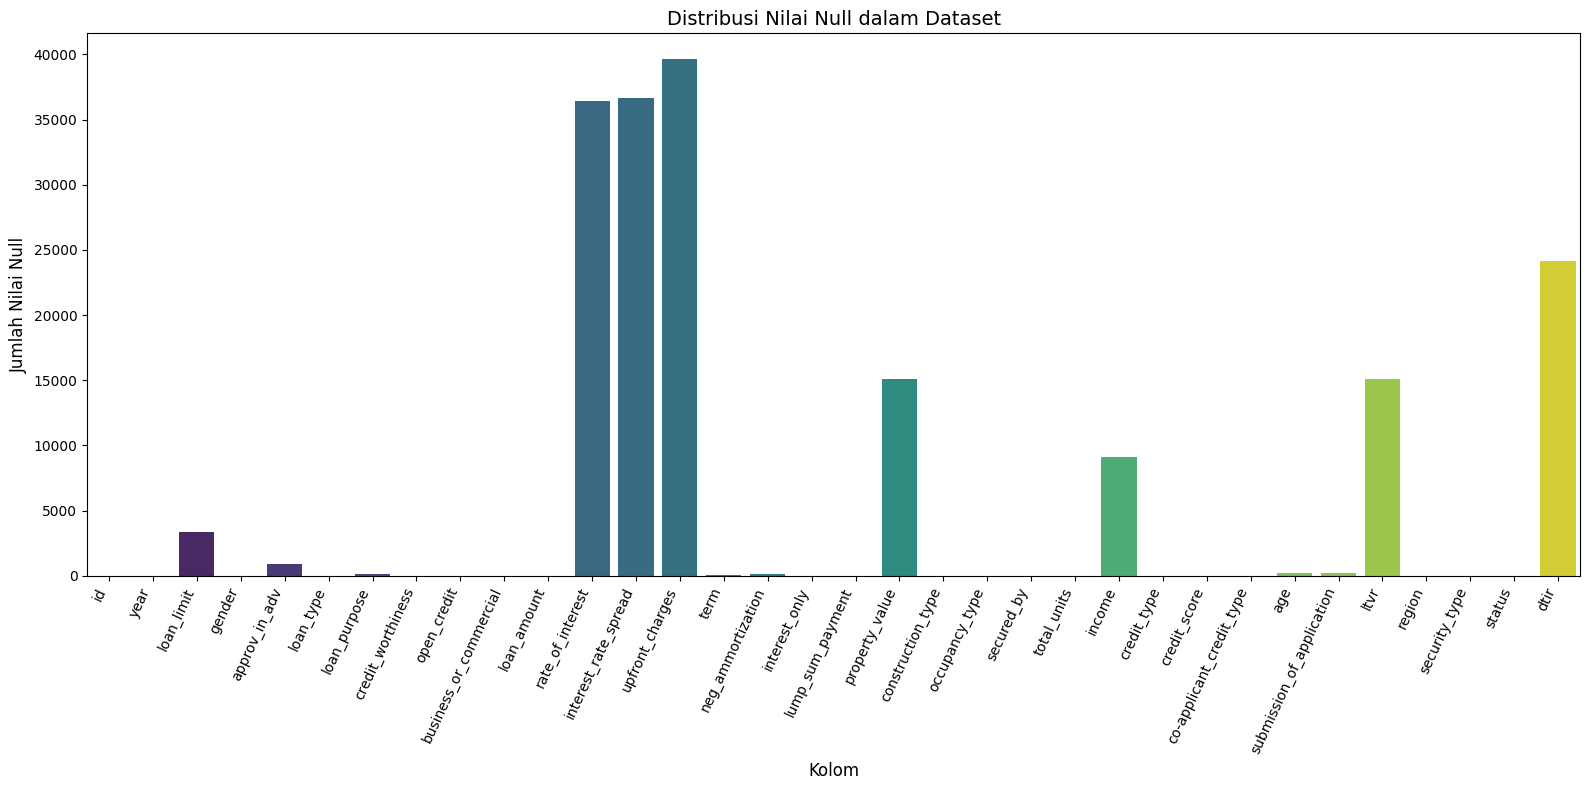

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(
    x=data.columns,
    y=data.isnull().sum().values,
    palette='viridis'
)
plt.title('Distribusi Nilai Null dalam Dataset', fontsize=14)
plt.xlabel('Kolom', fontsize=12)
plt.ylabel('Jumlah Nilai Null', fontsize=12)
plt.xticks(rotation=65, ha='right')
plt.tight_layout()
plt.show()



### **Distribusi kolom "status"**




Disini akan dilakukannya visualisasi terhadap distribusi kolom target yaitu kolom status, untuk mengetahui secara keseluruhan tentang berapa banyak pendistibusian antara nilai 0 dan 1 pada kolom 'status'

<ipython-input-197-b0f193595a98>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='status', palette='viridis')


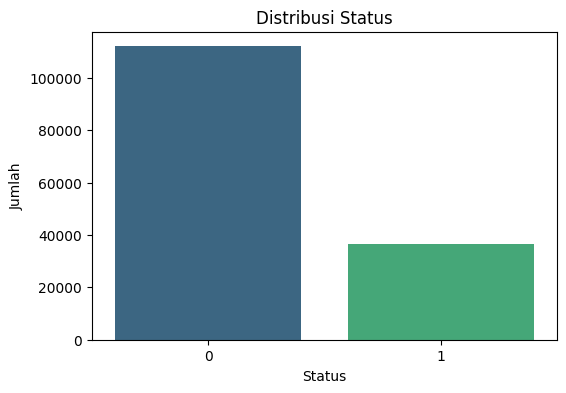

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='status', palette='viridis')
plt.title('Distribusi Status')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()



### **Visualisasi Korelasi Loan Defaulter pada Kolom Kategorikal**





Dengan menggunakan Count Plot, visualisasi ini berfungsi untuk menunjukkan distribusi frekuensi dari setiap kategori pada kolom kategorikal dalam dataset, dengan hue nya berdasarkan status. Visualisasi ini memudahkan untuk mengidentifikasi pola atau tren dalam data agar memberikan iformasi untuk analisis lebih lanjut

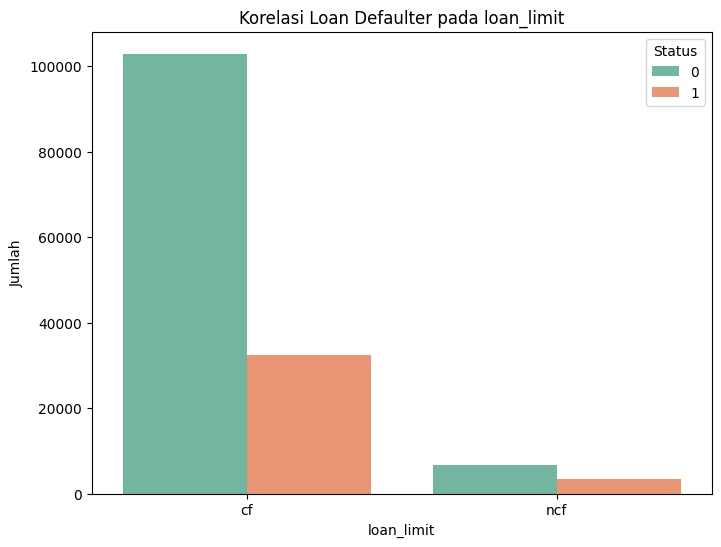

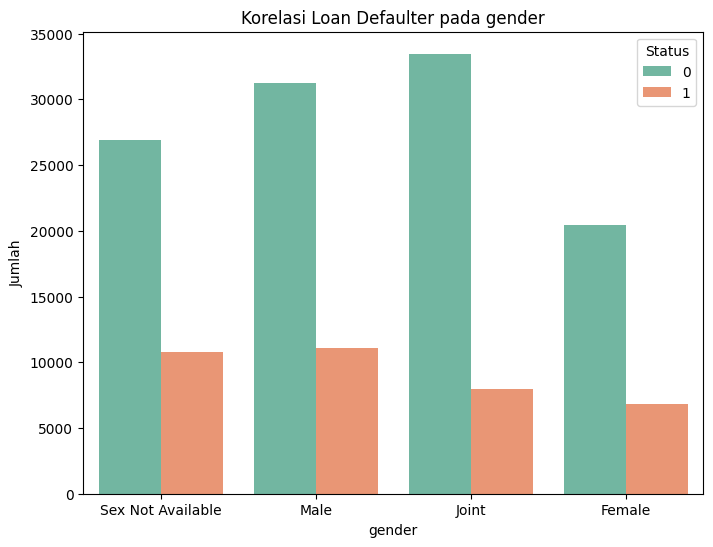

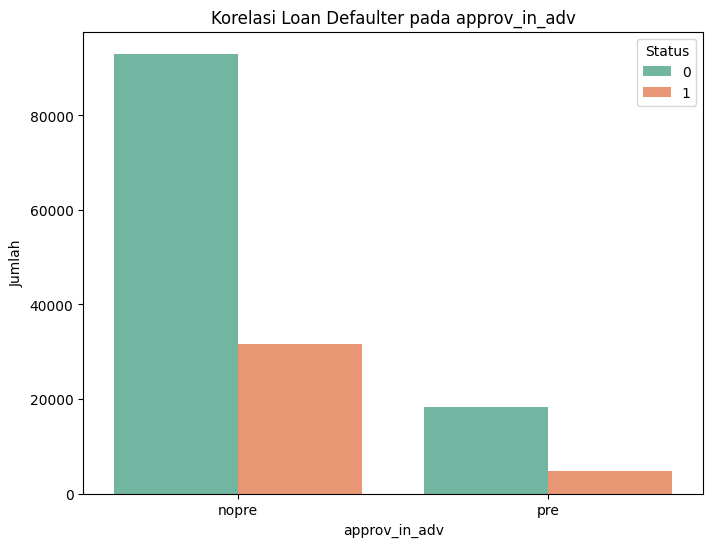

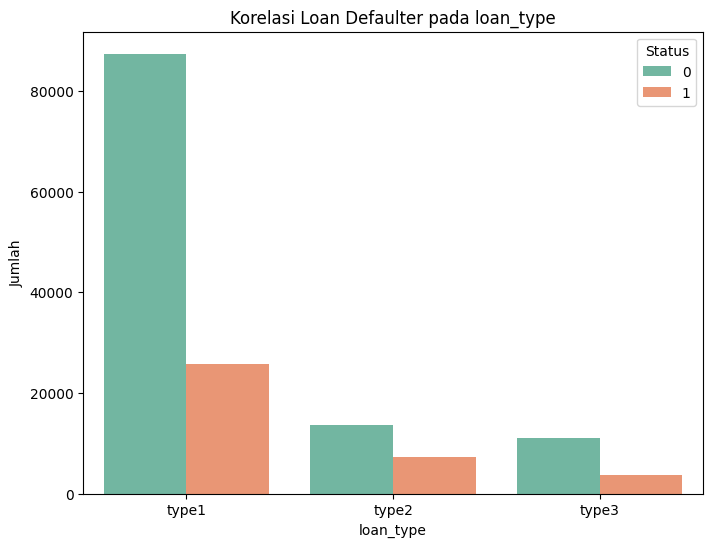

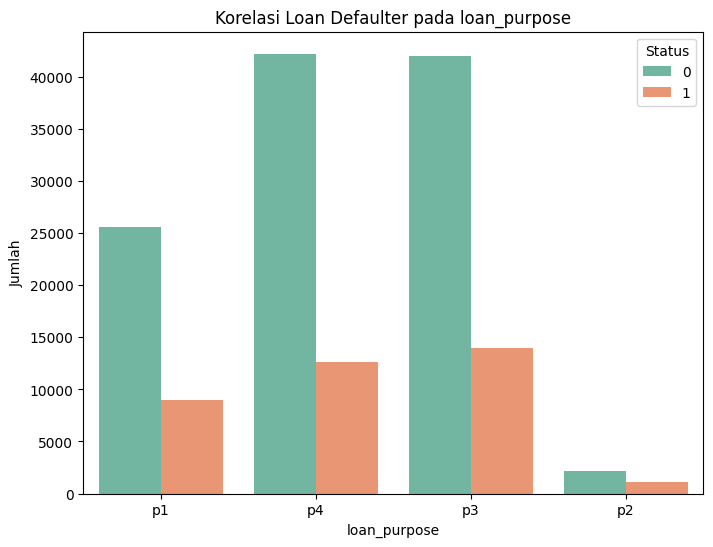

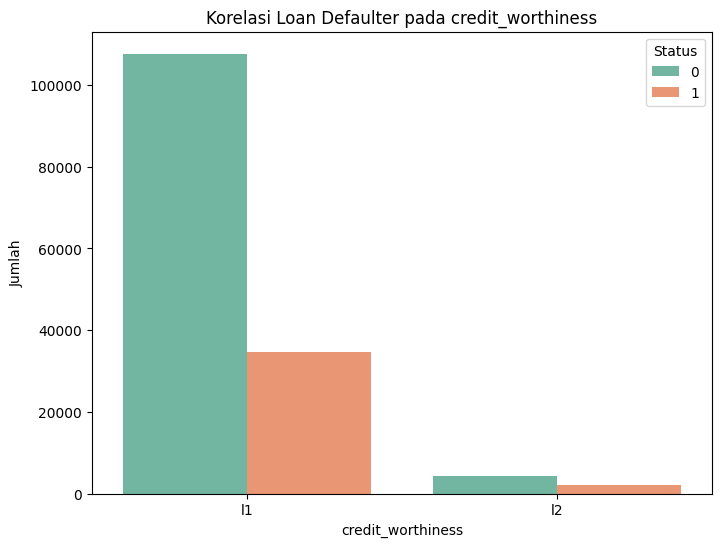

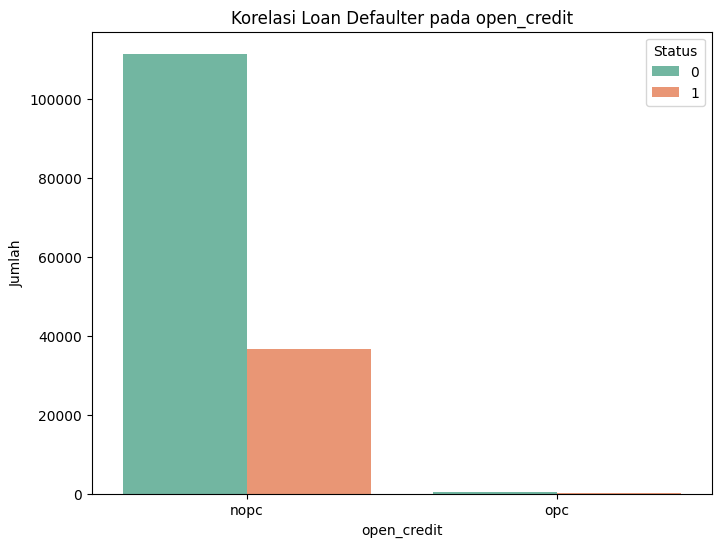

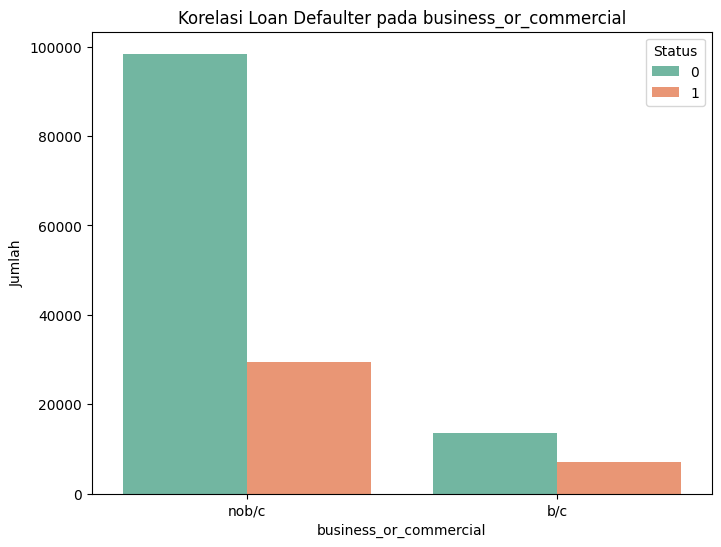

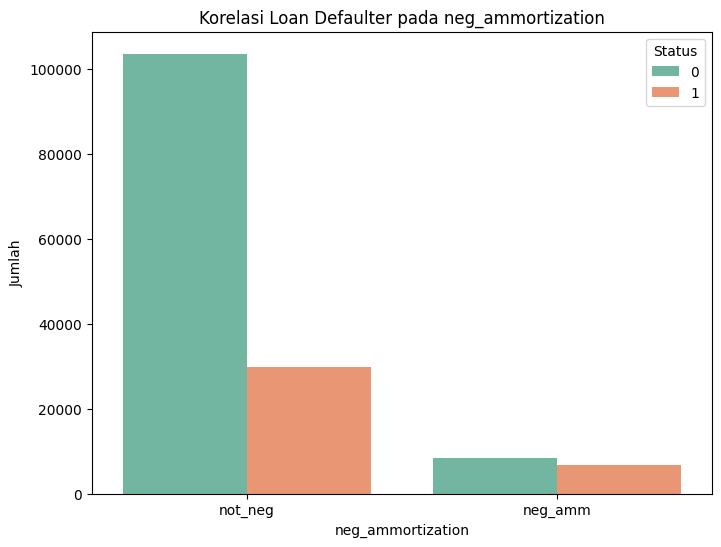

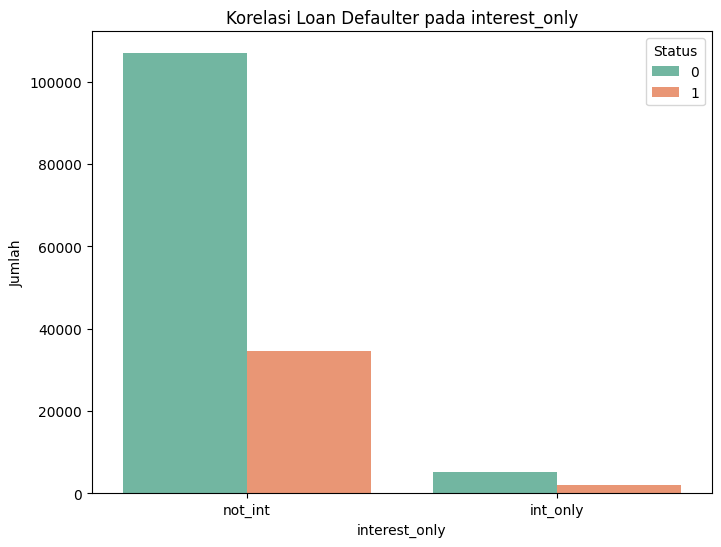

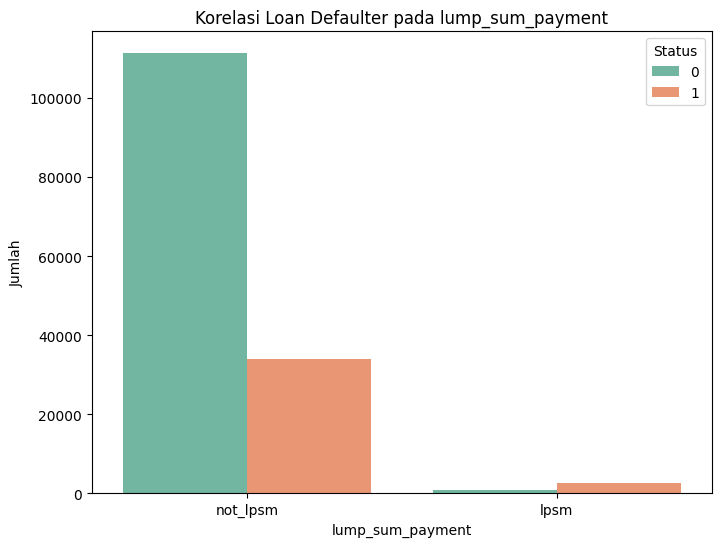

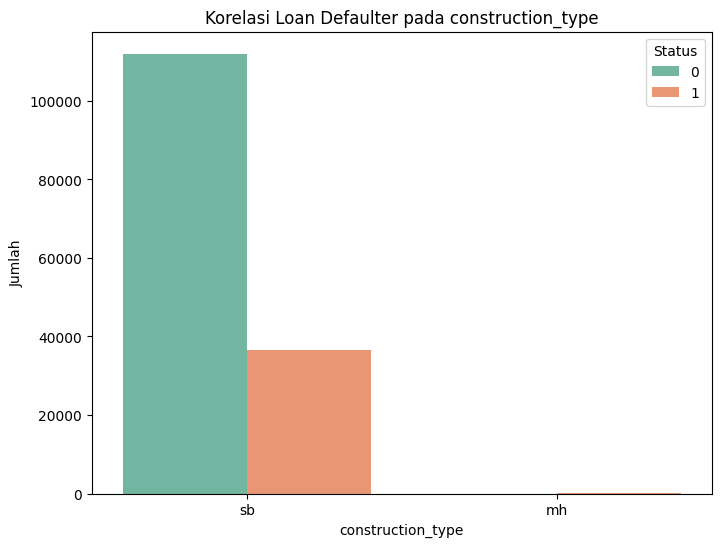

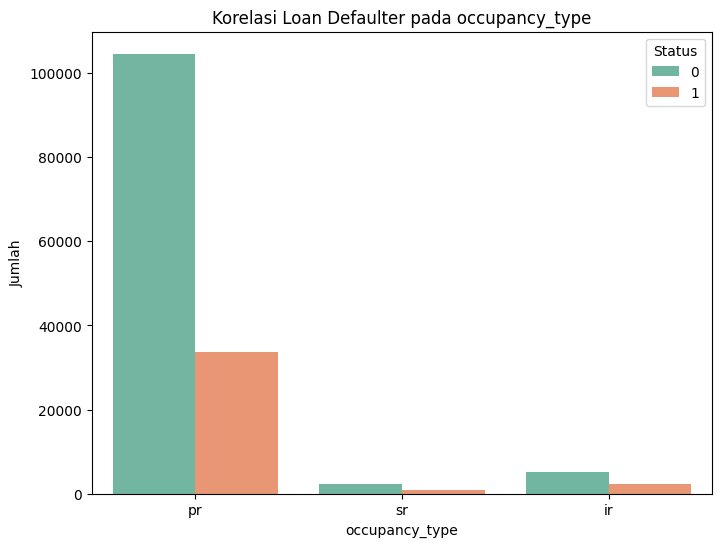

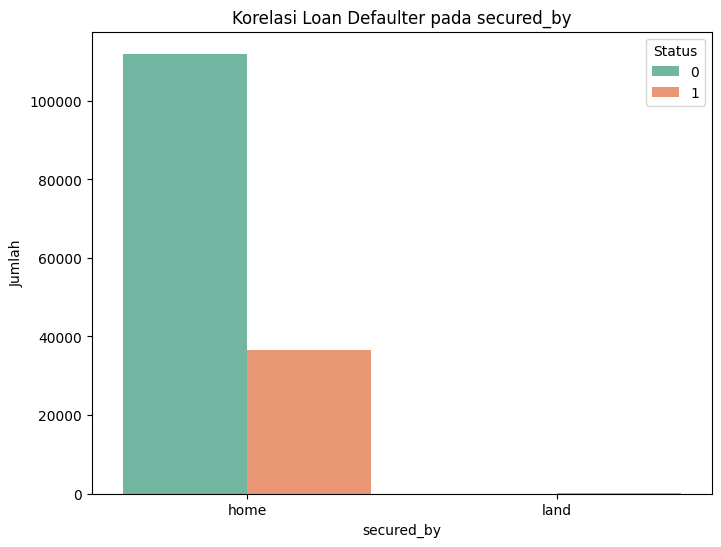

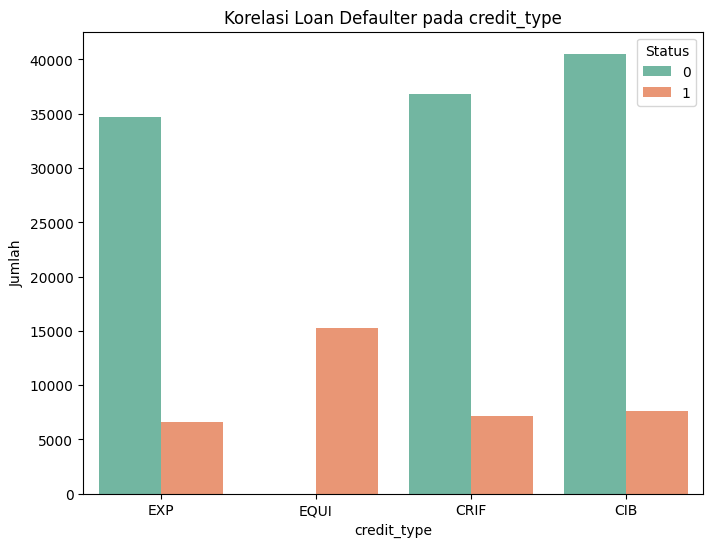

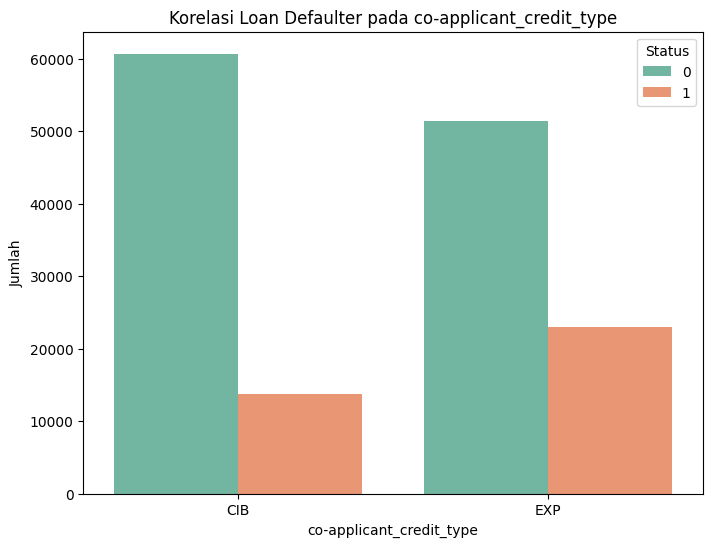

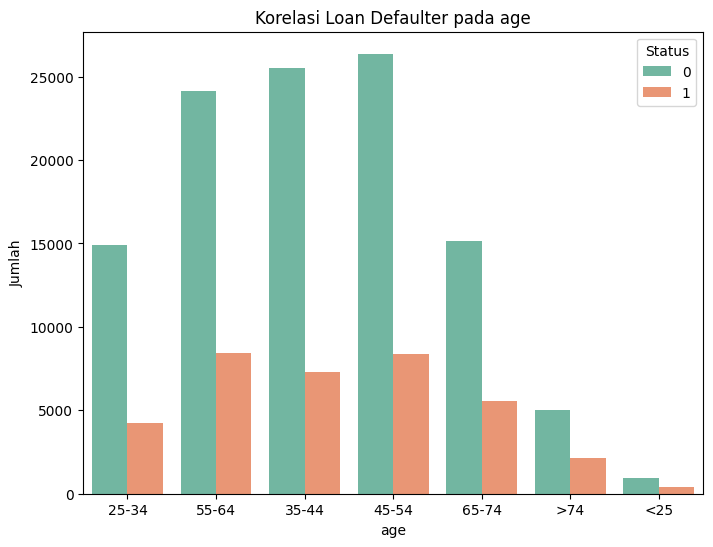

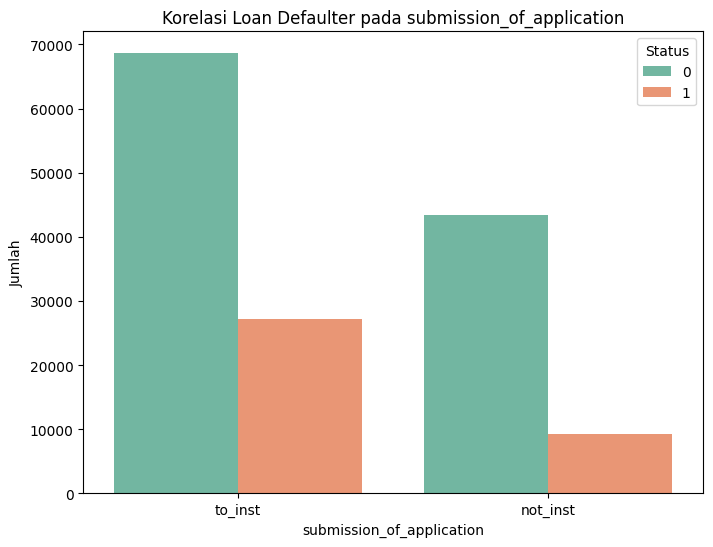

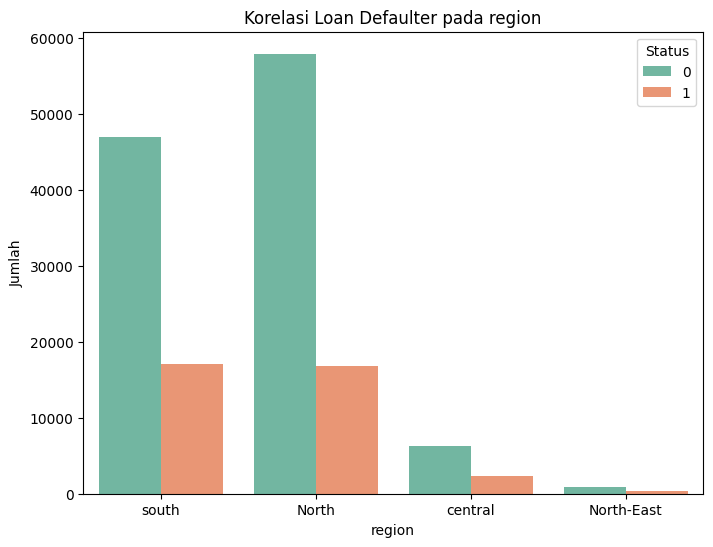

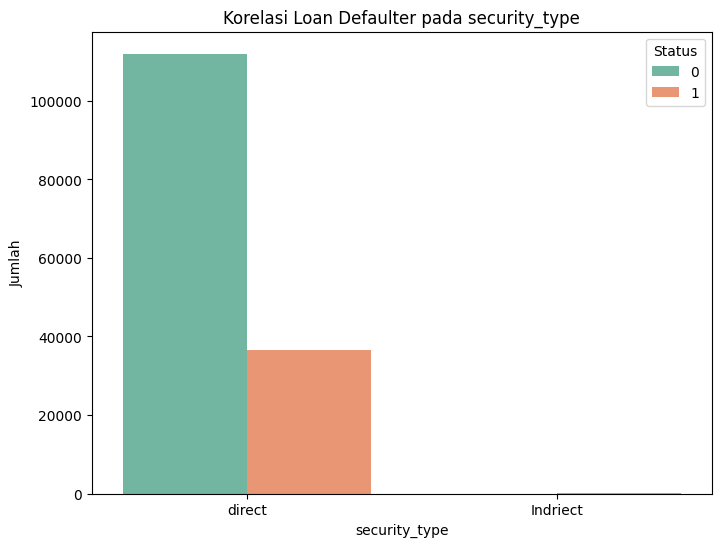

In [ ]:
categorical_columns = ['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit', 'business_or_commercial', 'neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'secured_by', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'region', 'security_type']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col, hue='status', palette='Set2')
    plt.title(f'Korelasi Loan Defaulter pada {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.legend(title='Status')
    plt.show()



### **Visualisasi Korelasi Loan Defaulter pada Kolom Numerikal**

**1. Heatmap Korelasi Antar Fitur Numerik**

Matriks korelasi akan menunjukkan hubungan linier antara setiap pasangan kolom numerik. Dimana setiap nilai di dalam matriks ini mencerminkan seberapa kuat hubungan antaa dua variabel numerik.

Dengan penggunaan Heat Map korelasi, dapat membantu memahami hubungan antar varibael numerik dan mendeteksi multikolinearitas (variabel fitur yang sangat berkolerasi), yang sangat penting untuk membangun model yang lebih stabil

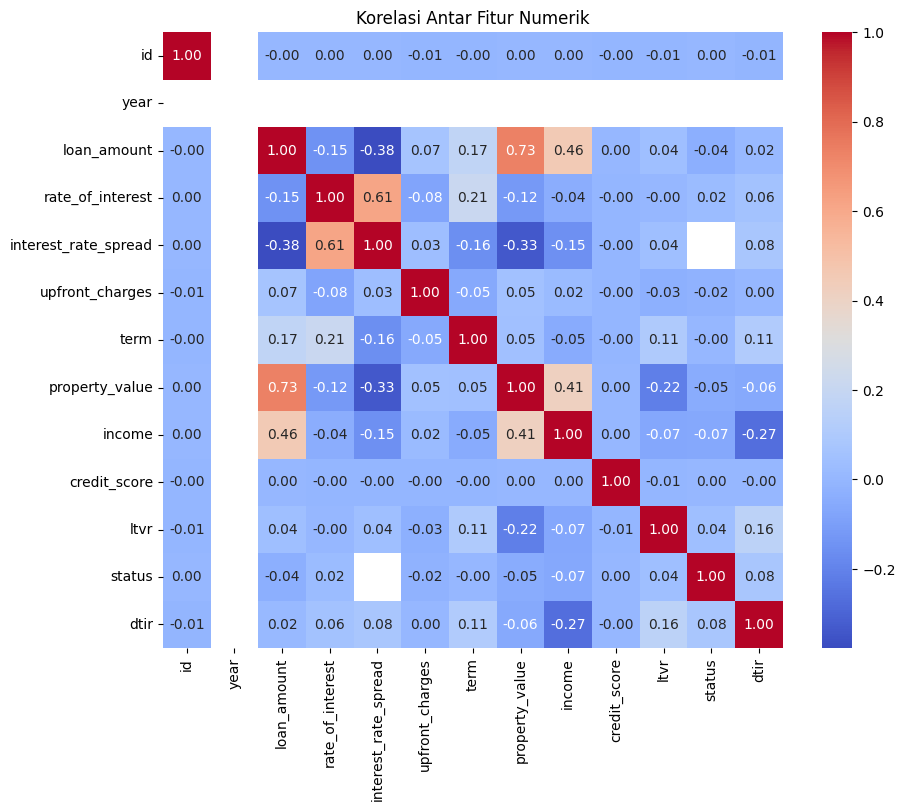

In [ ]:
numerical_features = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()


- 1 untuk korelasi sempurna positif (kedua variabel bergerak dalam arah yang sama)
- -1 untuk korelasi sempurna negatif (kedua variabel bergerak dalam arah yang berlawanan)
- 0 berarti tidak ada korelasi linier antara kedua variabel

Dari hasil korelasi matriks tersebut, terdapat korelasi kuat antara beberapa variabel seperti loan_amount dengan propery_value, serta rate_of_interest dan interest_rate_Spread dan juga variabel status tidak menunjukkan korelasi yang kuat dengan sebagian besar fitur lain, yang bisa jadi menandakan bahwa faktor lain selain fitur numerik mungkin lebih relevan dalam menentukan status tersebut

**2. Visualisasi Distribusi Loan Defaulter pada Kolom Numerik**

Dengan menggunakan Histogram untuk menampilkan distribusi data numerik berdasarkan status loan defaulter dengan hue nya status pada setiap fitur numerik. Visualisasi ini di lakukan agar bisa menampilkan gambaran yang lebih jelas tentang perbandingan distirbusi antara Defaulter dengan Non-Defaulter pada setiap kolom numerik nya

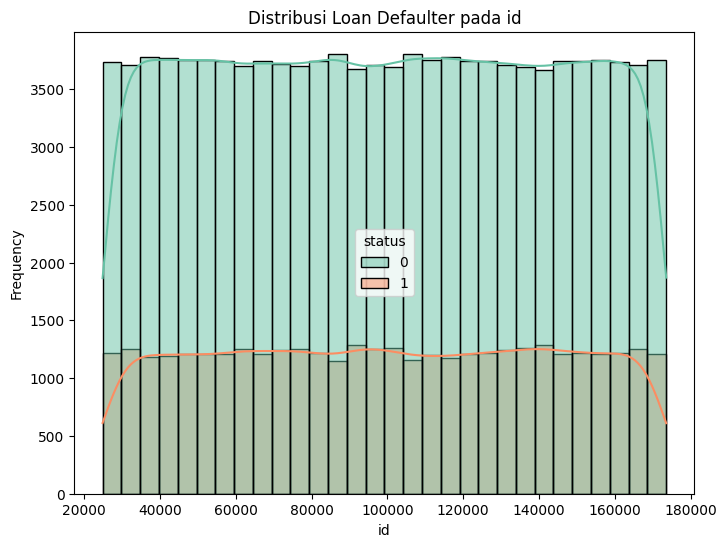

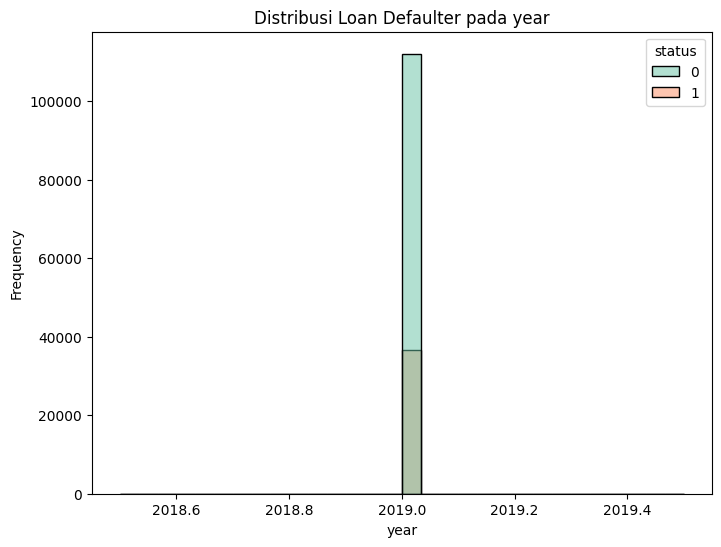

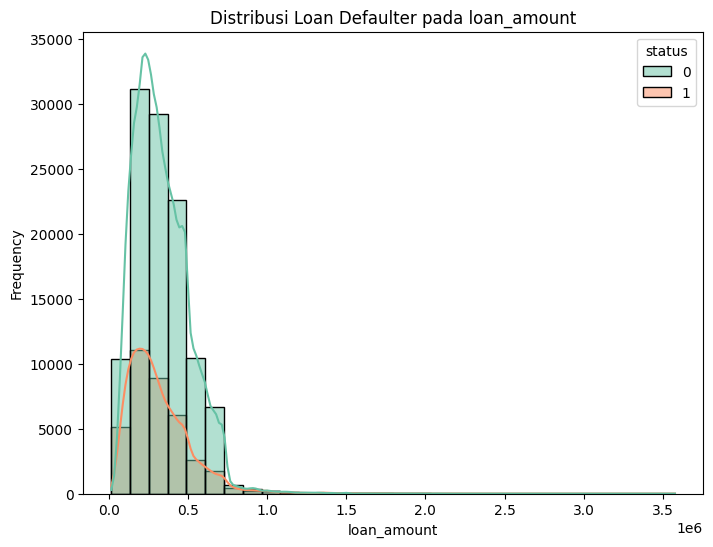

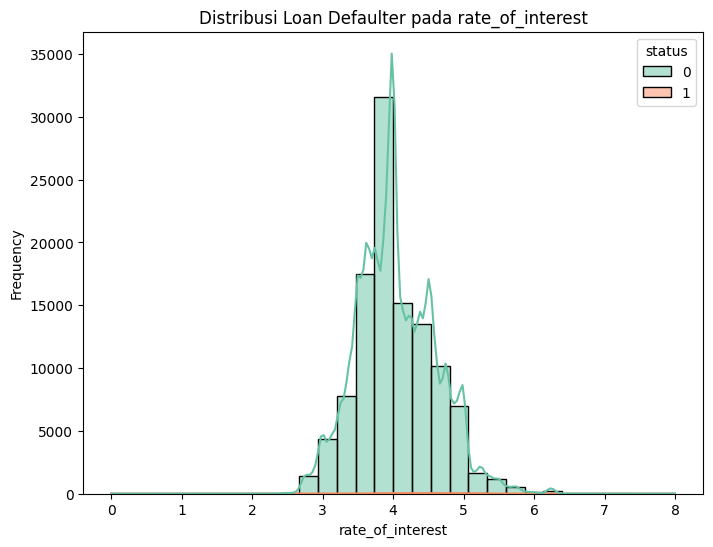

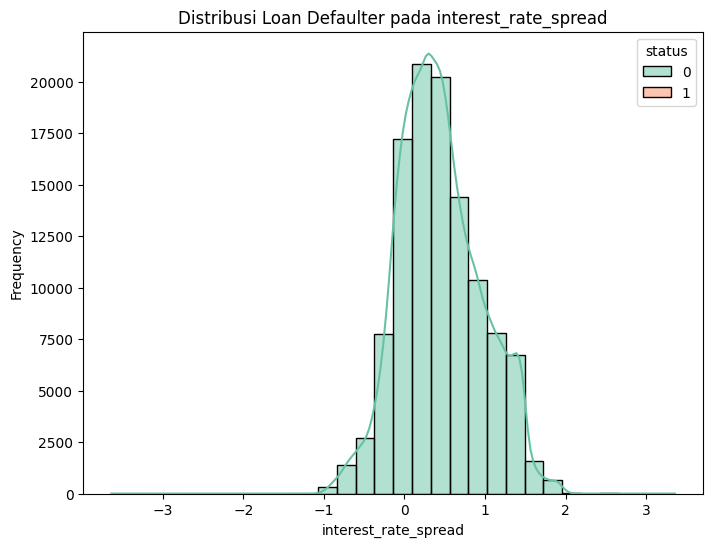

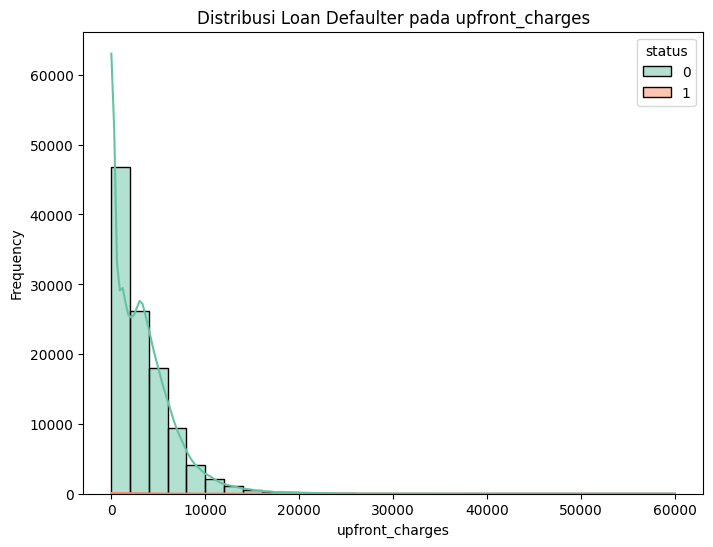

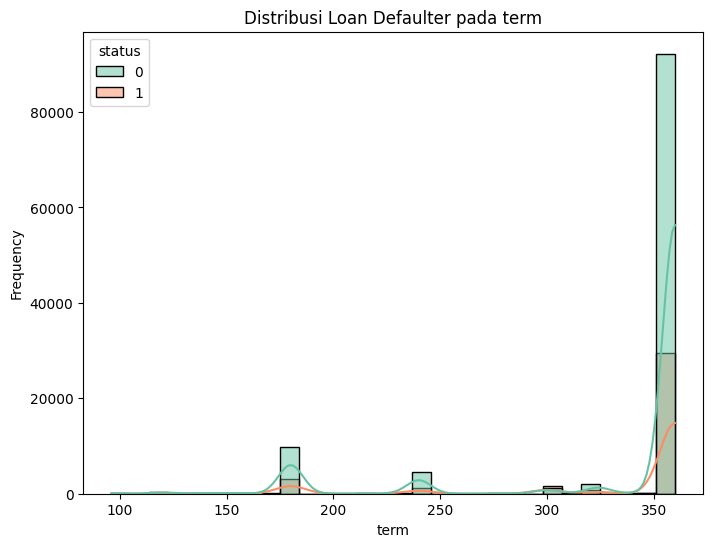

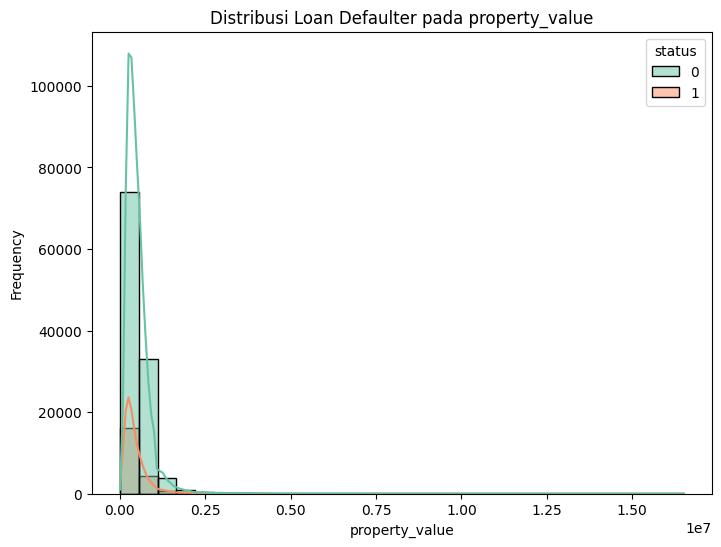

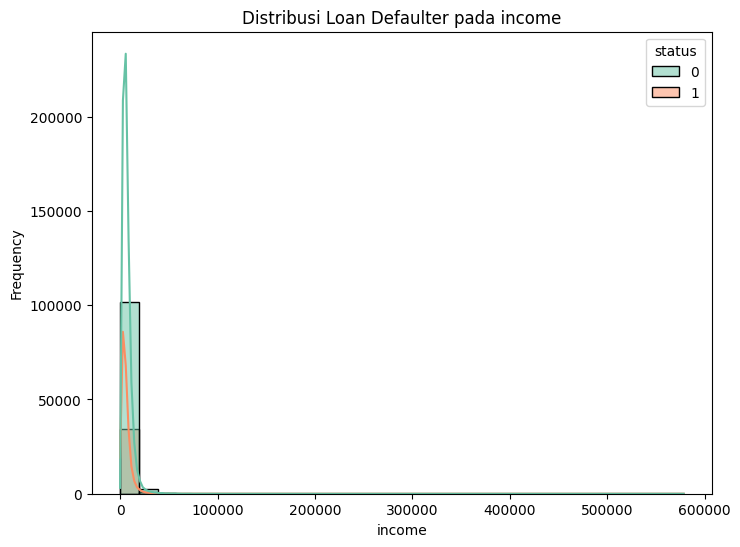

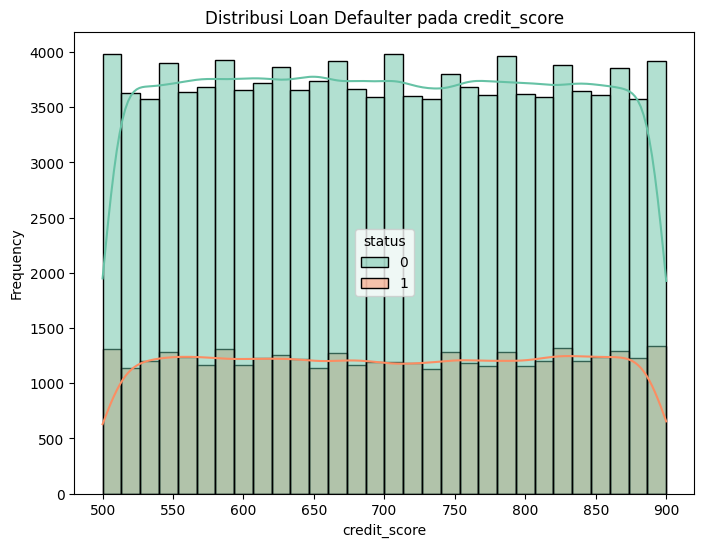

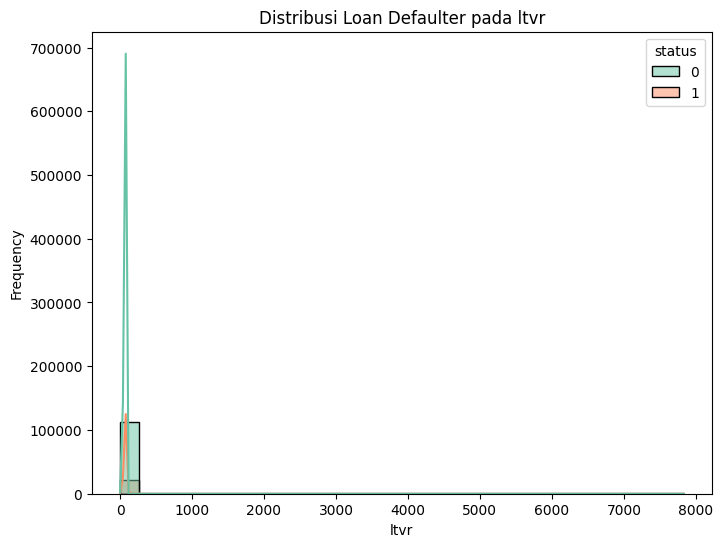

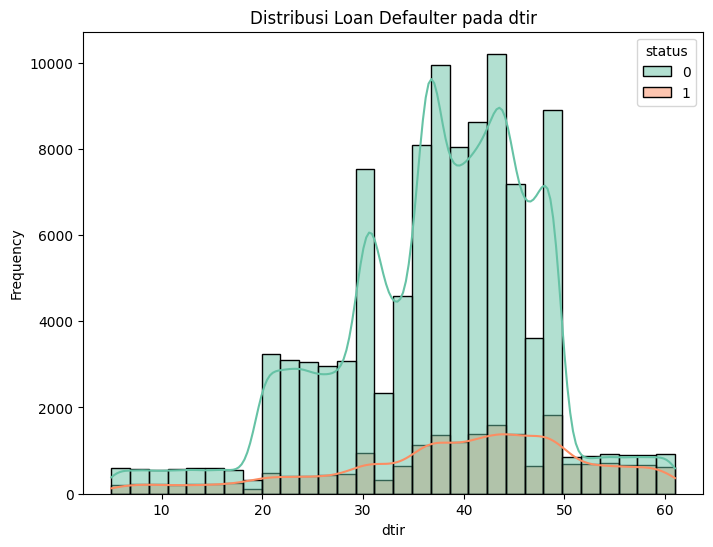

In [ ]:
numerical_columns = ['id', 'year','loan_amount', 'rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'term', 'property_value', 'income', 'credit_score', 'ltvr', 'dtir']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=col, hue='status', kde=True, palette='Set2', bins=30)
    plt.title(f'Distribusi Loan Defaulter pada {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## **1.7 Data Cleaning**

### 1. Dropping Columns

Melalukan penghapusan kolom yang tidak penting dan tidak relevan untuk dijadikan kolom fitur terhadap kolom target atau tidak signifikan terhadap model dan tidak memiliki hubungan jelas dengan kolom target

In [ ]:
data = data.drop(columns=['id', 'year', 'credit_score', 'region', 'age', 'interest_rate_spread', 'property_value'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   credit_worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  upfront_charges            109028 non-null  float64
 11  term                       148629 non-null  float64
 12  neg_ammortization          148549 non-null  object 
 13  interest_only              14

Seperti yang bisa dilihat, kolom dataset sudah berkurang yang tadi nya memiliki 33 kolom, sekarang sudah ada 26 kolom yang di anggap sudah cukup relevan terhadap model nanti nya

Kemudian, dengan `data.describe()`, akan diberikannya gambaran ringkasan statistik dari dataset, tentang gambaran umum distribusi dan karakteristik dasar data numerik pada setiap kolom. Ini berdungsi untuk memahami struktur data dan mendeteksi pola pada data



In [ ]:
data.describe()

,loan_amount,rate_of_interest,upfront_charges,term,income,ltvr,status,dtir
count,1.486700e+05,112231.000000,109028.000000,148629.000000,139520.000000,133572.000000,148670.000000,124549.000000
mean,3.311177e+05,4.045476,3224.996127,335.136582,6957.338876,72.746457,0.246445,37.732932
std,1.839093e+05,0.561391,3251.121510,58.409084,6496.586382,39.967603,0.430942,10.545435
min,1.650000e+04,0.000000,0.000000,96.000000,0.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,3.625000,581.490000,360.000000,3720.000000,60.474860,0.000000,31.000000
50%,2.965000e+05,3.990000,2596.450000,360.000000,5760.000000,75.135870,0.000000,39.000000
75%,4.365000e+05,4.375000,4812.500000,360.000000,8520.000000,86.184211,0.000000,45.000000
max,3.576500e+06,8.000000,60000.000000,360.000000,578580.000000,7831.250000,1.000000,61.000000


### 2. Handling Duplicates

Melakuakn pengecekan terhadap data duplikat lalu kemudian dilakukannya penghapusan dari data duplikat tersebut

In [ ]:
data.duplicated().sum()

373

Terdapat 373 jumlah data duplikat yang terdapat pada dataset. Lalu akan kita hapus

In [ ]:
data = data.drop_duplicates()


### 3. Handling Missing Values and NaN

Karena sebelumnua sudah terlihat ada beberapa kolom yang memiliki missing values, pada bagian ini missing values akan di tangani begitu juga dengan NaN yang mungkin ada pada beberapa kolom yang berada di dataset

In [ ]:
data.isnull().sum()

,0
loan_limit,3344
gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
credit_worthiness,0
open_credit,0
business_or_commercial,0
loan_amount,0
rate_of_interest,36121


Pertama disini, di tampilkan gambaran awal tentang berapa banyak jumlah null atau missing values dalam setiap kolom dataset nya

Kemudian fungsi ini akan digunkana untuk menghitung persentase nilai yang hilang pada setiap kolom dalam dataset, ini dapat memberikan gambaran tentang seberapa besar proporsi nilai hilang dibandingkan dengan total jumlah data pada setiap kolom

In [ ]:
(data.isnull().sum() / len(data)) * 100

,0
loan_limit,2.254934
gender,0.000000
approv_in_adv,0.612285
loan_type,0.000000
loan_purpose,0.090359
credit_worthiness,0.000000
open_credit,0.000000
business_or_commercial,0.000000
loan_amount,0.000000
rate_of_interest,24.357202


Dari hasil yang di tampilkan, dapat kita lihat terdapat beberapa kolom yang perlu di lakukannya penanganan terhadap missing values. Dimana ada 11 kolom yaitu loan_limit, approv_in_adv, loan_purpose, rate_of_interest, upfront_charges, term, neg_ammortization, income, submission_of_application, ltvr, dan dtir

- loan_limit



Langkah pertama ialah untuk melihat nilai-nilai unique apa saja yang terdapat di kolom loan_limit sekaligus untuk mengecek apakah terdapat NaN nya juga di dalamnya

In [ ]:
data['loan_limit'].unique()

array(['cf', nan, 'ncf'], dtype=object)

Setelah itu, kita akan mengisi nilai Nan dan Missing values pada kolom loan_limit dengan mode yaitu nilai yang paling sering muncul dari kolom tersebut

In [ ]:
data['loan_limit'] = data['loan_limit'].fillna(data['loan_limit'].mode()[0])

data['loan_limit'].unique()

array(['cf', 'ncf'], dtype=object)

Dapat kita lihat, hasil akhirnya jika kita tampilkan lagi nilai unique pada kolom tersebut tidak terdapat lagi nan di dalamnya, karena nan dan missing values sudah berhasil di isi dan di tangani

- approv_in_adv

Sekarang untuk kolom approv_in_adv. Langkah yang di lakukan tetap sama yaitu pertama untuk mengecek apakah ada nilai nan pada kolom, kemudian nilai tersebut akan di isi dengan mode (nilai yang paling sering muncul pada kolom) hingga nan dan missing values berhasil di tangani dengan baik

In [ ]:
data['approv_in_adv'].unique()

array(['nopre', 'pre', nan], dtype=object)

In [ ]:
data['approv_in_adv'] = data['approv_in_adv'].fillna(data['approv_in_adv'].mode()[0])

data['approv_in_adv'].unique()

array(['nopre', 'pre'], dtype=object)

- loan_purpose

Sekarang untuk kolom loan_purpose. Langkah yang di lakukan tetap sama yaitu pertama untuk mengecek apakah ada nilai nan pada kolom, kemudian nilai tersebut akan di isi dengan mode (nilai yang paling sering muncul pada kolom) hingga nan dan missing values berhasil di tangani dengan baik

In [ ]:
data['loan_purpose'].unique()

array(['p1', 'p4', 'p3', 'p2', nan], dtype=object)

In [ ]:
data['loan_purpose'] = data['loan_purpose'].fillna(data['loan_purpose'].mode()[0])

data['loan_purpose'].unique()

array(['p1', 'p4', 'p3', 'p2'], dtype=object)

- neg_ammortization

Sekarang untuk kolom neg_ammortization. Langkah yang di lakukan tetap sama yaitu pertama untuk mengecek apakah ada nilai nan pada kolom, kemudian nilai tersebut akan di isi dengan mode (nilai yang paling sering muncul pada kolom) hingga nan dan missing values berhasil di tangani dengan baik

In [ ]:
data['neg_ammortization'].unique()

array(['not_neg', 'neg_amm', nan], dtype=object)

In [ ]:
data['neg_ammortization'] = data['neg_ammortization'].fillna(data['neg_ammortization'].mode()[0])

data['neg_ammortization'].unique()

array(['not_neg', 'neg_amm'], dtype=object)

- submission_of_application

Sekarang untuk kolom submission_of_application. Langkah yang di lakukan tetap sama yaitu pertama untuk mengecek apakah ada nilai nan pada kolom, kemudian nilai tersebut akan di isi dengan mode (nilai yang paling sering muncul pada kolom) hingga nan dan missing values berhasil di tangani dengan baik

In [ ]:
data['submission_of_application'].unique()

array(['to_inst', 'not_inst', nan], dtype=object)

In [ ]:
data['submission_of_application'] = data['submission_of_application'].fillna(data['submission_of_application'].mode()[0])

data['submission_of_application'].unique()

array(['to_inst', 'not_inst'], dtype=object)

- rate_of_interest

Karena beberapa kolom sebelumnya merupakan kolom kategorikal, untuk penanganan missing values dan nan bagi kategorikal dan numerikal kali ini akan sedikit berbeda. Pada kolom numerikal ini, data akan di analisis terlebih dahulu menggunakan Boxplot. Boxplot digunakan untuk melihat distributi data numerik, termasuk mendeteksi outlier di dalamnya

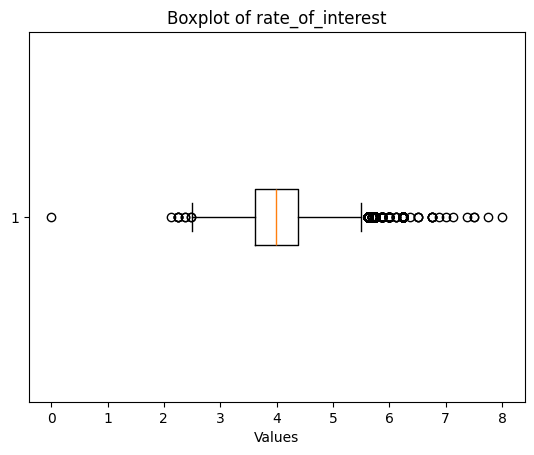

In [ ]:
plt.boxplot(data['rate_of_interest'].dropna(), vert=False)
plt.title('Boxplot of rate_of_interest')
plt.xlabel('Values')
plt.show()

Hasil observasi dari diagram boxplot pada kolom rate_of_interest antara lain : median terlihat mendekati nilai 4, banuak titik di sebelah kanan (Nilai > 6) yang menunjukkan outlier, Distribusi data tampak skewed ke kanan (Tidak simetris)

Untuk penanganan kolom rate_of_interest kali ini akan digunakannya median untuk mengisi missing values. Hal ini dikarnakan kolom memliki distribusi data tidak simetris, dalam kondisi ini mean tidak cocok digunakan karena dipengaruhi oleh outlier

In [ ]:
data['rate_of_interest'].fillna(data['rate_of_interest'].median(), inplace=True)

<ipython-input-219-9d6b9c099a1d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rate_of_interest'].fillna(data['rate_of_interest'].median(), inplace=True)


- upfront_charges

Sama seperti penangan missing values pada kolom rate_of_interest sebelumnya, penangan missing values pada kolom numerik upfront_charges juga pertama akan di sajikan gambaran boxplot dari kolom tersebut untuk di analisis

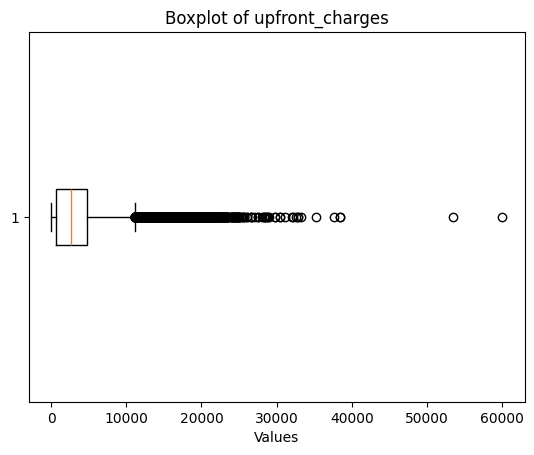

In [ ]:
plt.boxplot(data['upfront_charges'].dropna(), vert=False)
plt.title('Boxplot of upfront_charges')
plt.xlabel('Values')
plt.show()

Hasil observasi dari diagram boxplot pada kolom upfront_charges antara lain : median terlihat mendekati nilai 0 hingga nilai kecil, mayoritas nilai data berada dekat 0 hingga 1000, sedangkan terdapat nilai-nilai ekstrem yang jauh lebih besar. Banyak titik di sebelah kanan yang menunjukkan outlier yang ekstrem hingga 60.000, ini menunjukkan adanya outlier ekstrem yang jauh lebih besar dibanding mayoritas data

Untuk penanganan kolom upfront_charges akan digunakannya median untuk mengisi missing values. Hal ini dikarnakan kolom memliki distribusi data tidak simetris, dalam kondisi ini mean tidak cocok digunakan karena dipengaruhi oleh outlier

In [ ]:
data['upfront_charges'].fillna(data['upfront_charges'].median(), inplace=True)

<ipython-input-221-e4922240836a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['upfront_charges'].fillna(data['upfront_charges'].median(), inplace=True)


- term

Sama seperti penangan missing values pada kolom-kolom sebelumnya, penangan missing values pada kolom term juga pertama akan di sajikan gambaran boxplot dari kolom tersebut untuk di analisis

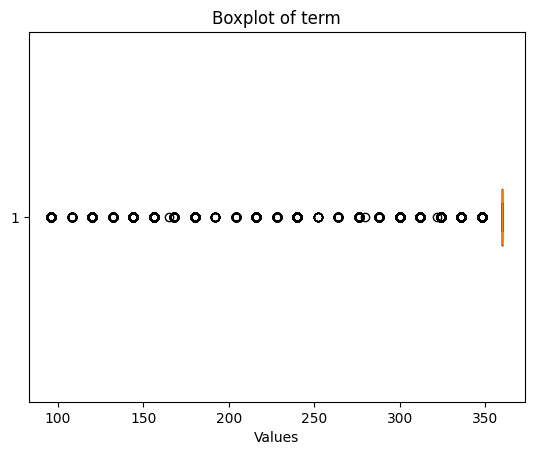

In [ ]:
plt.boxplot(data['term'].dropna(), vert=False)
plt.title('Boxplot of term')
plt.xlabel('Values')
plt.show()

Hasil observasi dari diagram boxplot pada kolom term antara lain : median terlihat disekitar nilai 360, median terletak di dekat nilai maksimum. Terdapat banyak outlier di bagian nilai yang lebih rendah, dari sekitar 100-350. Data term memiliki distribusi sangat tidak seimbang ke kiri (left-skewed)

Untuk penanganan kolom term akan digunakannya median untuk mengisi missing values. Hal ini dikarnakan kolom memliki distribusi data tidak simetris, dalam kondisi ini mean tidak cocok digunakan karena dipengaruhi oleh outlier

In [ ]:
data['term'].fillna(data['term'].median(), inplace=True)

<ipython-input-223-288a10f63d43>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['term'].fillna(data['term'].median(), inplace=True)


- income

Penangan missing values pada kolom income juga pertama akan di sajikan gambaran boxplot dari kolom tersebut untuk di analisis

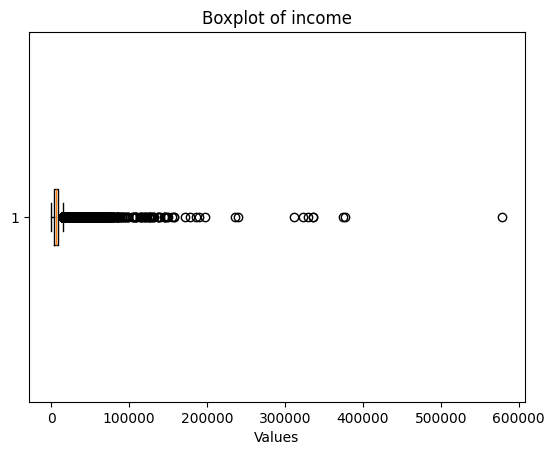

In [ ]:
plt.boxplot(data['income'].dropna(), vert=False)
plt.title('Boxplot of income')
plt.xlabel('Values')
plt.show()

Hasil observasi dari diagram boxplot pada kolom income antara lain : median terlihat mendekati nilai 0 hingga nilai kecil, sedangkan terdapat nilai-nilai ekstrem yang jauh lebih besar. Banyak titik di sebelah kanan yang menunjukkan outlier yang ekstrem hingga 400.000 dan juga ada outlier yang mencapai nilai 600.000, ini menunjukkan adanya outlier ekstrem yang jauh lebih besar dibanding mayoritas data

Untuk penanganan kolom income akan digunakannya median untuk mengisi missing values. Hal ini dikarnakan kolom memliki distribusi data tidak simetris, dalam kondisi ini mean tidak cocok digunakan karena dipengaruhi oleh outlier

In [ ]:
data['income'].fillna(data['income'].median(), inplace=True)

<ipython-input-225-a59e0757dc70>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['income'].fillna(data['income'].median(), inplace=True)


- ltvr

Penangan missing values pada kolom ltvr juga pertama akan di sajikan gambaran boxplot dari kolom tersebut untuk di analisis

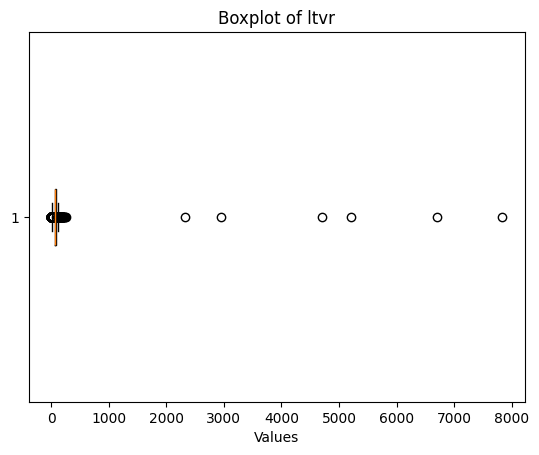

In [ ]:
plt.boxplot(data['ltvr'].dropna(), vert=False)
plt.title('Boxplot of ltvr')
plt.xlabel('Values')
plt.show()

Hasil observasi dari diagram boxplot pada kolom income antara lain : Median terletak di sekitar nilai rendah, Ada beberapa outlier yang sangat jauh dari data utama, nilai-nilai ini terdistribusi antara 1000 hingga lebih dari 7000. Data sangat tidak seimbang ke kanan (right-skewed) dengan outlier di bagian nilai yang tinggi

Untuk penanganan kolom ltvr akan digunakannya median untuk mengisi missing values. Hal ini dikarnakan kolom memliki distribusi data tidak simetris, dalam kondisi ini mean tidak cocok digunakan karena dipengaruhi oleh outlier

In [ ]:
data['ltvr'].fillna(data['ltvr'].median(), inplace=True)

<ipython-input-227-4846ceeefc08>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ltvr'].fillna(data['ltvr'].median(), inplace=True)


- dtir

Penangan missing values pada kolom dtir juga pertama akan di sajikan gambaran boxplot dari kolom tersebut untuk di analisis

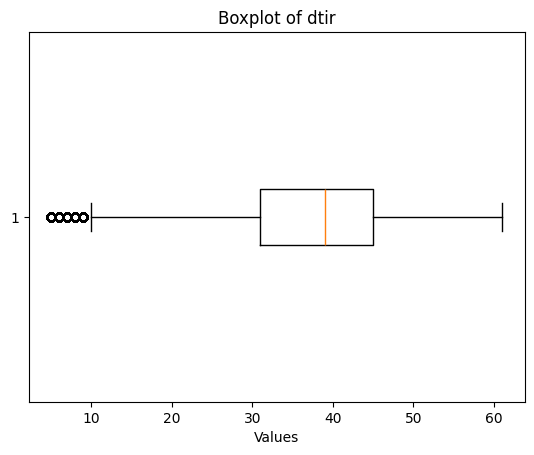

In [ ]:
plt.boxplot(data['dtir'].dropna(), vert=False)
plt.title('Boxplot of dtir')
plt.xlabel('Values')
plt.show()

Hasil observasi dari diagram boxplot pada kolom income antara lain : Median terletak di tengah-tengah kotak yang menunjukkan bahwa data memiliki distribusi yang cukup simetris tidak terlalu skewed, Ada sejumlah outlier di nilai rendah (kurang dari 10)

Untuk penanganan kolom dtir akan digunakannya median untuk mengisi missing values. Hal ini dikarnakan kolom memliki distribusi data tidak simetris, dalam kondisi ini mean tidak cocok digunakan karena dipengaruhi oleh outlier

In [ ]:
data['dtir'].fillna(data['dtir'].median(), inplace=True)

<ipython-input-229-ee031ee04612>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['dtir'].fillna(data['dtir'].median(), inplace=True)


Maka, dataset telah bersih dari nilai null atau missing values juga dengan nilai nan. Berikut akan kita periksan kembali berapa jumlah null dan nan yang sekarang ada di dataset

In [ ]:
data.isnull().sum()

,0
loan_limit,0
gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
credit_worthiness,0
open_credit,0
business_or_commercial,0
loan_amount,0
rate_of_interest,0


In [ ]:
data.isna().sum()

,0
loan_limit,0
gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
credit_worthiness,0
open_credit,0
business_or_commercial,0
loan_amount,0
rate_of_interest,0


Data sudah berhasil di bersihkan dari missing values dan nan

# 2. Feature Engineering

## **2.1 Encoding**

Disini akan dilakukannya feature engineering sebagai salah satu tahap upaya untuk melakukan imporvement terhadap model awal. Akan di lakukannya enccoding terhadap data kategorikal, dan di lakukannya dua encoding yaitu label encoding dan one-hot encoding

Sebelum dilakukannya encoding terhadap kolom-kolom kategorikal, ada baik nya melakukan fungsi untuk menampilkan kolom-kolom dari dataset yang memiliki tipe data object untuk dapat melakukan identifikasi awal terhadap kolom-kolom kategorikal yang memiliki tipe data object (atau juga kolom teks)

In [ ]:
data.select_dtypes(include=['object'])

,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,secured_by,total_units,credit_type,co-applicant_credit_type,submission_of_application,security_type
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,to_inst,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,lpsm,sb,pr,home,1U,EQUI,EXP,to_inst,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,to_inst,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,not_inst,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CRIF,EXP,not_inst,direct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CIB,EXP,to_inst,direct
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,ir,home,4U,CIB,CIB,not_inst,direct
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CIB,EXP,not_inst,direct
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,EXP,to_inst,direct


Hasilnya, terdapat 19 kolom kategorikal yang bertipe data object yang perlu di tangani

- Kolom loan_limit

Pada kolom loan_limit akan di lakukannya One-Hot Encoding dimana setiap nilai unik yang berada pada kolom tersebut akan di ubah menjadi kolom baru yang berisi nilai false (0) and true (1) . Pertama kita akan mengecek isi unik dari kolom loan_limit, kemudian akan di lakukannya encoding


In [ ]:
data['loan_limit'].unique()

array(['cf', 'ncf'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['loan_limit'], drop_first=True)

Setelah di lakukannya encoding, kolom baru loan_limit_ncf akan di tambahkan yang isinya akan berisi 0 dan 1 dimana jika nilai asli adalah ncf akan dilambangkan 1 di kolom tersebut dan jika nilai asli cf akan di tandai dengan 0 pada kolom tersebut

Parameter drop_first=True digunakan untuk menghindari dummy variable dengan membang salah satu kolom hasil encoding, dalam kasus ini makanya hanya menghasilkan satu kolom saja yaitu loan_limit_ncf

Nah, apa bedanya dengan melakukan label encoding saja? mengapa tidak di lakukannya label encoding, ialah karena kami tidak ingin memberikan asumsi hubungan antara kategori secara langsung

- Kolom gender

Pada kolom gender juga akan di lakukannya One-Hot Encoding. Pertama kita akan mengecek isi unik dari kolom gender, kemudian akan di lakukannya encoding

In [ ]:
data['gender'].unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['gender'], drop_first=True)

Setelah di lakukannya encoding, kolom baru gender_joint, gender_male dan gender_sex Not Available akan di tambahkan yang isinya akan berisi 0 dan 1 dimana
- Pada kolom gender_joint 0 berarti gender tidak bergabung, dan jika 1 berarti gender bergabung
- Untuk kolom gender_male akan secara tidak langsung mewakili dua gender yang berbeda yaitu female dan male. Jika 1 akan menandakan bahwa Male dan 0 akan menandakan Female
- Pada kolom gender sex not available, 1 berari true dan 0 berarti false

- Kolom approv_in_adv

Pada kolom approv_in_adv juga akan di lakukannya One-Hot Encoding. Pertama kita akan mengecek isi unik dari kolom approv_in_adv, kemudian akan di lakukannya encoding

In [ ]:
data['approv_in_adv'].unique()

array(['nopre', 'pre'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['approv_in_adv'], drop_first=True)

Setelah di lakukannya encoding, kolom baru approv_in_adv_pre akan di tambahkan yang isinya akan berisi 0 dan 1 dimana jika nilai asli adalah pre akan dilambangkan 1 di kolom tersebut dan jika nilai asli nopre akan di tandai dengan 0 pada kolom tersebut

- Kolom loan_type

Pada kolom loan_type juga akan di lakukannya One-Hot Encoding. Pertama kita akan mengecek isi unik dari kolom loan_type, kemudian akan di lakukannya encoding

In [ ]:
data['loan_type'].unique()

array(['type1', 'type2', 'type3'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['loan_type'], drop_first=True)

Setelah di lakukannya encoding, kolom baru hanya akan di tambahkan 2 dari 3 kategori yang berbeda pada loan_type ini. Terdapat kolom loan_type_type2 dan loan_type_type3. Penjelasannya adalah Jika loan_type_type2 dan loan_type_type3 sama sama menghasilkan 0 maka artinya meruju pada kategori type1

- Kolom loan_purpose

Pada kolom loan_purpose juga akan di lakukannya One-Hot Encoding. Pertama kita akan mengecek isi unik dari kolom loan_purpose, kemudian akan di lakukannya encoding

In [ ]:
data['loan_purpose'].unique()

array(['p1', 'p4', 'p3', 'p2'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['loan_purpose'], drop_first=True)

Setelah di lakukannya encoding, kolom baru hanya akan di tambahkan 3 dari 4 kategori yang berbeda pada loan_purpose ini. Terdapat kolom loan_purpose_p2, loan_purpose_p3 dan loan_purpose_p4. Penjelasannya adalah Jika loan_purpose_p2, loan_purpose_p3 dan loan_purpose_p4 sama sama menghasilkan 0 maka artinya merujuk pada kategori p1

- Kolom credit_worthiness

Pada kolom credit_worthiness akan di lakukannya Custom Label Encoding, dimana kolom akan di encoding berdasarkan urutan yang ditentukan oleh kami sendiri.
Pertama kita akan mengecek isi unik dari kolom credit_worthiness, kemudian akan di lakukannya encoding

In [ ]:
data['credit_worthiness'].unique()

array(['l1', 'l2'], dtype=object)

In [ ]:
custom_order = ['l2', 'l1']
custom_label_map = {category: idx for idx, category in enumerate(custom_order)}
data['credit_worthiness'] = data['credit_worthiness'].map(custom_label_map)

Hasil yang di dapatkan ialah l2 dilambangkan menjadi 0 dan l1 menjadi 1. Mengapa? karena l1 menandakan level 1  (low risk) dimana memiliki resiko yang lebih rendah dan memiliki kelayakan yang lebih baik di bandingkan dengan level 2 (high risk) yang memliki resiko lebih tinggi

- Kolom open_credit

Pada kolom open_credit juga akan di lakukannya One-Hot Encoding. Pertama kita akan mengecek isi unik dari kolom open_credit, kemudian akan di lakukannya encoding

In [ ]:
data['open_credit'].unique()

array(['nopc', 'opc'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['open_credit'], drop_first=True)

Setelah di lakukannya encoding, kolom baru open_credit_opc akan di tambahkan yang isinya akan berisi 0 dan 1 dimana jika nilai asli adalah opc akan dilambangkan 1 di kolom tersebut dan jika nilai asli nopc akan di tandai dengan 0 pada kolom tersebut

- Kolom business_or_commercial

Pada kolom business_or_commercial juga akan di lakukannya One-Hot Encoding. Pertama kita akan mengecek isi unik dari kolom business_or_commercial, kemudian akan di lakukannya encoding

In [ ]:
data['business_or_commercial'].unique()

array(['nob/c', 'b/c'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['business_or_commercial'], drop_first=True)

Setelah di lakukannya encoding, kolom baru business_or_commercial_nob/c akan di tambahkan yang isinya akan berisi 0 dan 1 dimana jika nilai asli adalah nob/c akan dilambangkan 1 di kolom tersebut dan jika nilai asli b/c akan di tandai dengan 0 pada kolom tersebut

- Kolom neg_ammortization

Pada kolom neg_ammortization juga akan di lakukannya One-Hot Encoding. Pertama kita akan mengecek isi unik dari kolom neg_ammortization, kemudian akan di lakukannya encoding

In [ ]:
data['neg_ammortization'].unique()

array(['not_neg', 'neg_amm'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['neg_ammortization'], drop_first=True)

Setelah di lakukannya encoding, kolom baru neg_ammortization_not_neg akan di tambahkan yang isinya akan berisi 0 dan 1 dimana jika nilai asli adalah not_neg akan dilambangkan 1 di kolom tersebut dan jika nilai asli neg_amm akan di tandai dengan 0 pada kolom tersebut

- Kolom interest_only

Pada kolom interest_only juga akan di lakukannya One-Hot Encoding. Pertama kita akan mengecek isi unik dari kolom interest_only, kemudian akan di lakukannya encoding

In [ ]:
data['interest_only'].unique()

array(['not_int', 'int_only'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['interest_only'], drop_first=True)

Setelah di lakukannya encoding, kolom baru interest_only_not_int akan di tambahkan yang isinya akan berisi 0 dan 1 dimana jika nilai asli adalah not_int akan dilambangkan 1 di kolom tersebut dan jika nilai asli int_only akan di tandai dengan 0 pada kolom tersebut

- Kolom lump_sum_payment

Pada kolom lump_sum_payment juga akan di lakukannya One-Hot Encoding. Pertama kita akan mengecek isi unik dari kolom lump_sum_payment, kemudian akan di lakukannya encoding

In [ ]:
data['lump_sum_payment'].unique()

array(['not_lpsm', 'lpsm'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['lump_sum_payment'], drop_first=True)

Setelah di lakukannya encoding, kolom baru lump_sum_payment_not_lpsm akan di tambahkan yang isinya akan berisi 0 dan 1 dimana jika nilai asli adalah not_lpsm akan dilambangkan 1 di kolom tersebut dan jika nilai asli lpsm akan di tandai dengan 0 pada kolom tersebut

- Kolom construction_type

Pada kolom  construction_type juga akan di lakukannya One-Hot Encoding. Pertama kita akan mengecek isi unik dari kolom  construction_type, kemudian akan di lakukannya encoding

In [ ]:
data['construction_type'].unique()

array(['sb', 'mh'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['construction_type'], drop_first=True)

Setelah di lakukannya encoding, kolom baru construction_type_sb akan di tambahkan yang isinya akan berisi 0 dan 1 dimana jika nilai asli adalah sb akan dilambangkan 1 di kolom tersebut dan jika nilai asli mh akan di tandai dengan 0 pada kolom tersebut

- Kolom occupancy_type

Pada kolom occupancy_type juga akan di lakukannya One-Hot Encoding. Pertama kita akan mengecek isi unik dari kolom occupancy_type, kemudian akan di lakukannya encoding

In [ ]:
data['occupancy_type'].unique()

array(['pr', 'sr', 'ir'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['occupancy_type'], drop_first=True)

Setelah di lakukannya encoding, kolom baru hanya akan di tambahkan 2 dari 3 kategori yang berbeda pada occupancy_type ini. Terdapat kolom occupancy_type_pr dan occupancy_type_sr . Penjelasannya adalah Jika occupancy_type_pr dan occupancy_type_sr sama sama menghasilkan 0 maka artinya meruju pada kategori ir

- Kolom secured_by

Pada kolom secured_by juga akan di lakukannya One-Hot Encoding. Pertama kita akan mengecek isi unik dari kolom secured_by, kemudian akan di lakukannya encoding

In [ ]:
data['secured_by'].unique()

array(['home', 'land'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['secured_by'], drop_first=True)

Setelah di lakukannya encoding, kolom baru secured_by_land akan di tambahkan yang isinya akan berisi 0 dan 1 dimana jika nilai asli adalah land akan dilambangkan 1 di kolom tersebut dan jika nilai asli home akan di tandai dengan 0 pada kolom tersebut

- Kolom total_units

Pada kolom total_units akan di lakukannya Label Encoding, dimana kolom akan di encoding berdasarkan urutan alfabetis. Pertama kita akan mengecek isi unik dari kolom total_units, kemudian akan di lakukannya encoding

In [ ]:
data['total_units'].unique()

array(['1U', '2U', '3U', '4U'], dtype=object)

In [ ]:
le = LabelEncoder()
data['total_units'] = le.fit_transform(data['total_units'])

Maka, hasil dari label encoding akan merujuk pada 1U sebagai 0, 2U sebagai 1, 3U sebagai 2 dan 4U sebagai 3

- Kolom credit_type

Pada kolom credit_type juga akan di lakukannya One-Hot Encoding. Pertama kita akan mengecek isi unik dari kolom credit_type, kemudian akan di lakukannya encoding

In [ ]:
data['credit_type'].unique()

array(['EXP', 'EQUI', 'CRIF', 'CIB'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['credit_type'], drop_first=True)

Setelah di lakukannya encoding, kolom baru hanya akan di tambahkan 3 dari 4 kategori yang berbeda pada credit_type ini. Terdapat kolom credit_type_CRIF, credit_type_EQUI dan credit_type_EXP. Penjelasannya adalah Jika credit_type_CRIF, credit_type_EQUI dan credit_type_EXP sama sama menghasilkan 0 maka artinya merujulk pada kategori CIB

- Kolom co-applicant_credit_type

Pada kolom co-applicant_credit_type juga akan di lakukannya One-Hot Encoding. Pertama kita akan mengecek isi unik dari kolom co-applicant_credit_type, kemudian akan di lakukannya encoding

In [ ]:
data['co-applicant_credit_type'].unique()

array(['CIB', 'EXP'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['co-applicant_credit_type'], drop_first=True)

Setelah di lakukannya encoding, kolom baru co-applicant_credit_type_EXP akan di tambahkan yang isinya akan berisi 0 dan 1 dimana jika nilai asli adalah EXP akan dilambangkan 1 di kolom tersebut dan jika nilai asli CIB akan di tandai dengan 0 pada kolom tersebut

- Kolom submission_of_application

Pada kolom submission_of_application juga akan di lakukannya One-Hot Encoding. Pertama kita akan mengecek isi unik dari kolom submission_of_application, kemudian akan di lakukannya encoding

In [ ]:
data['submission_of_application'].unique()

array(['to_inst', 'not_inst'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['submission_of_application'], drop_first=True)

Setelah di lakukannya encoding, kolom baru submission_of_application_to_inst akan di tambahkan yang isinya akan berisi 0 dan 1 dimana jika nilai asli adalah to_inst akan dilambangkan 1 di kolom tersebut dan jika nilai asli not_inst akan di tandai dengan 0 pada kolom tersebut

- Kolom security_type

Pada kolom security_type juga akan di lakukannya One-Hot Encoding. Pertama kita akan mengecek isi unik dari kolom  security_type, kemudian akan di lakukannya encoding

In [ ]:
data['security_type'].unique()

array(['direct', 'Indriect'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['security_type'], drop_first=True)

Setelah di lakukannya encoding, kolom baru security_type_direct akan di tambahkan yang isinya akan berisi 0 dan 1 dimana jika nilai asli adalah direct akan dilambangkan 1 di kolom tersebut dan jika nilai asli indirect akan di tandai dengan 0 pada kolom tersebut

Berikut hasil akhir jumlah dari semua kolom yang berada di dataset setelah di lakukannya encoding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148297 entries, 0 to 148669
Data columns (total 35 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   credit_worthiness                  148297 non-null  int64  
 1   loan_amount                        148297 non-null  int64  
 2   rate_of_interest                   148297 non-null  float64
 3   upfront_charges                    148297 non-null  float64
 4   term                               148297 non-null  float64
 5   total_units                        148297 non-null  int64  
 6   income                             148297 non-null  float64
 7   ltvr                               148297 non-null  float64
 8   status                             148297 non-null  int64  
 9   dtir                               148297 non-null  float64
 10  loan_limit_ncf                     148297 non-null  bool   
 11  gender_Joint                       148297 no

## **2.2 Feature Transformation**

Feature Transformation sering digunakan dan di terapkan untuk kolom numerikal agar dapat menyesuaikan skala, tranformasi ini dilakukan untuk mengurangi Skewness atau kemiringan. Terdapat beberapa macam transformasi yang akan kami gunakan untuk menangani skewness ini antara lain :
1. Log Transformation = untuk mengurangi skewness data yang besar, digunakan untuk data yang miring ke kanan
2. Square Root Transformation = untuk mengurangi skewness data dengan mengambil akar kuadrat dari nilai-nilai data
3. Box-Cox Transformation = untuk menagangi data yang terdistribusi miring dan membantu membuat data lebih mendektai distribusi normal

Langkah pertama ialah untuk memilih dan memfilter kolom-kolom yang berada di dataset berdasarkan tipe data numerik yaitu float64 untuk bilangan desimal dan juga int64 untuk bilangan bulat

In [ ]:
data.select_dtypes(include=['float64'])

,rate_of_interest,upfront_charges,term,income,ltvr,dtir
0,3.990,2598.75,360.0,1740.0,98.728814,45.0
1,3.990,2598.75,360.0,4980.0,75.135870,39.0
2,4.560,595.00,360.0,9480.0,80.019685,46.0
3,4.250,2598.75,360.0,11880.0,69.376900,42.0
4,4.000,0.00,360.0,10440.0,91.886544,39.0
...,...,...,...,...,...,...
148665,3.125,9960.00,180.0,7860.0,71.792763,48.0
148666,5.190,0.00,360.0,7140.0,74.428934,15.0
148667,3.125,1226.64,180.0,6900.0,61.332418,49.0
148668,3.500,4323.33,180.0,7140.0,70.683453,29.0


In [ ]:
data.select_dtypes(include=['int64'])

,credit_worthiness,loan_amount,total_units,status
0,1,116500,0,1
1,1,206500,0,1
2,1,406500,0,0
3,1,456500,0,0
4,1,696500,0,0
...,...,...,...,...
148665,1,436500,0,0
148666,1,586500,3,0
148667,1,446500,0,0
148668,1,196500,0,0


Disini, kita bisa mendapatkan gambaran tentang distirbusi kolom numerik yang berada di dataset. Dan kita bisa mulai mengeksekusi satu per satu kolom tersebut untuk menangani skewness nya

- **Kolom loan_amount**

Dengan menggunakan boxplot akan membantu untuk memvisualisasikan distribusi data dan mendeteksi outliers pada kolom loan_amount terlebih dahulu

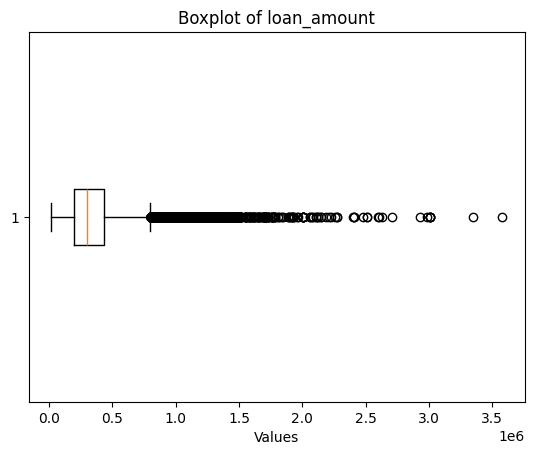

In [ ]:
plt.boxplot(data['loan_amount'].dropna(), vert=False)
plt.title('Boxplot of loan_amount')
plt.xlabel('Values')
plt.show()

Kemudian, menggunakan fungsi skew untuk mengukur kemiringan distribusi data dimana
1. Positif skew = merupakan data yang lebih terkonsentrasi di sisi kiri (nilai lebih rendah) dan memiliki ekor panjang ke kanan
2. Negatif skew = Data lebih terkonsentrasi di sisi kanan (nilai lebih tinggi) dan memiliki ekor panjang ke kiri
3. Skew = 0, artinya data simetris (normal distribution)

In [ ]:
data['loan_amount'].skew()

1.6669175410712236

Nilai skewness menunjukkan bahwa distribusi data pada loan_amount miring ke kanan atau positif skew

Transformasi Box-Cox mengubah data dengan tujuan untuk mengurangi skewness dan membuat distribusi lebih simetris. Penambahan 1 dilakukan untuk memastikan tidak ada nilai nol atau negatif dalam data.

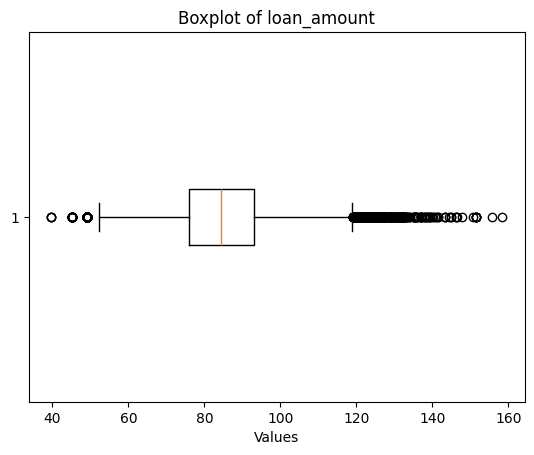

In [ ]:
data['loan_amount'] = stats.boxcox(data['loan_amount'] + 1)[0]
plt.boxplot(data['loan_amount'].dropna(), vert=False)
plt.title('Boxplot of loan_amount')
plt.xlabel('Values')
plt.show()

In [ ]:
data['loan_amount'].skew()

-0.006286127814587421

Setelah di lakukannya transformasi boxcox, dapat kita lihat kembali sekarang hasil nilai skewness nya sudah berubah dan menunjukkan bahwa distribusi data loan_amount sekarang sudah sangat mendekati simetris (skewness hampir 0)

- **Kolom rate_of_interest**

Dengan menggunakan boxplot akan membantu untuk memvisualisasikan distribusi data dan mendeteksi outliers pada kolom rate_of_interest terlebih dahulu

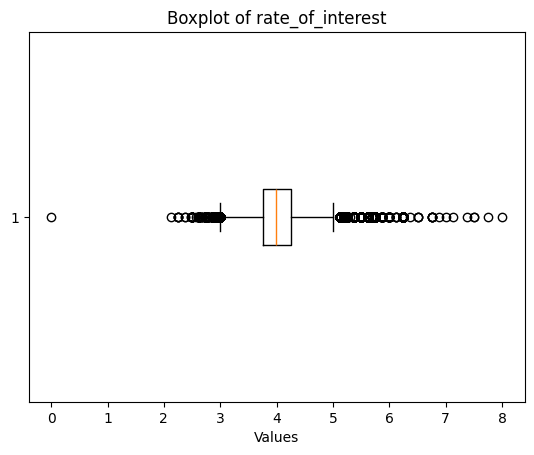

In [ ]:
plt.boxplot(data['rate_of_interest'].dropna(), vert=False)
plt.title('Boxplot of rate_of_interest')
plt.xlabel('Values')
plt.show()

In [ ]:
data['rate_of_interest'].skew()

0.5272875511380798

Nilai skewness menunjukkan bahwa distribusi data pada rate_of_interest cenderung miring ke kanan (positif skew) dengan beberapa nilai yang lebih tinggi

Transformasi Log mengubah data dengan tujuan untuk mengurangi skewness dan membuat distribusi lebih simetris. Penambahan 1 dilakukan untuk menghindari masalah log(0) (karena log(0) tidak terdefinisi)

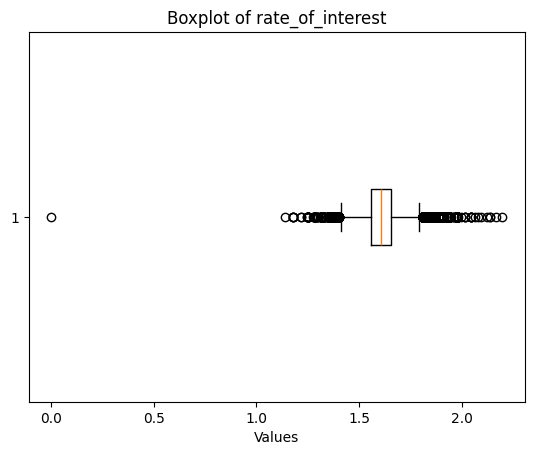

In [ ]:
data['rate_of_interest'] = np.log(data['rate_of_interest'] + 1)
plt.boxplot(data['rate_of_interest'].dropna(), vert=False)
plt.title('Boxplot of rate_of_interest')
plt.xlabel('Values')
plt.show()

In [ ]:
data['rate_of_interest'].skew()


0.06533561088229005

Setelah di lakukannya transformasi log, dapat kita lihat kembali sekarang hasil nilai skewness nya sudah berubah dan menunjukkan bahwa distribusi data rate_of_interest sekarang sudah lebih normal dan hampir simetris

- **Kolom upfront_charges**

Dengan menggunakan boxplot akan membantu untuk memvisualisasikan distribusi data dan mendeteksi outliers pada kolom upfront_charges terlebih dahulu

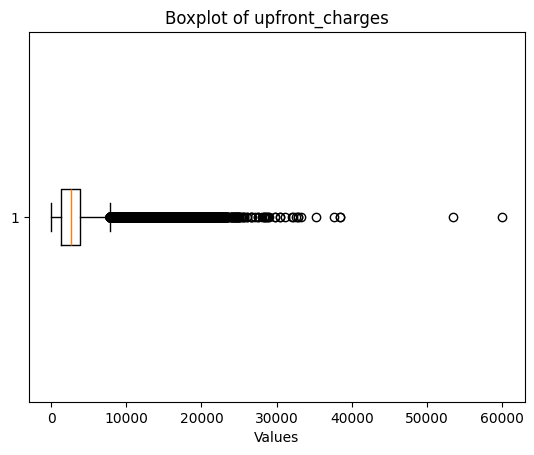

In [ ]:
plt.boxplot(data['upfront_charges'].dropna(), vert=False)
plt.title('Boxplot of upfront_charges')
plt.xlabel('Values')
plt.show()

In [ ]:
data['upfront_charges'].skew()

2.1916090452567256

Nilai skewness menunjukkan bahwa distribusi data pada upfront_charges miring ke kanan (positif skew) dengan beberapa nilai yang lebih tinggi mengarah ke sisi kanan

Transformasi square root mengubah data dengan tujuan untuk memperbaiki distribusi data yang terdistorsi secara signifikan ke kanan dengan mengurangi skewness.

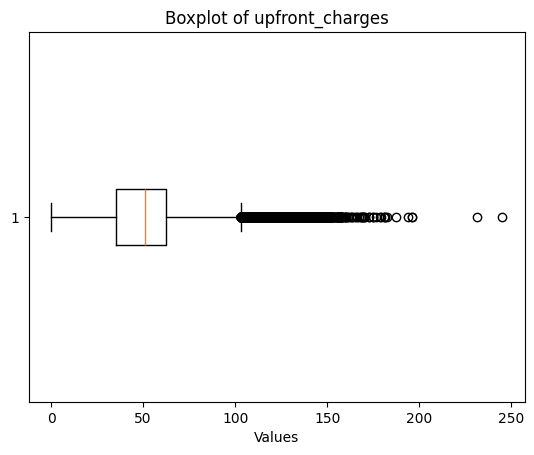

In [ ]:
data['upfront_charges'] = np.sqrt(data['upfront_charges'])
plt.boxplot(data['upfront_charges'].dropna(), vert=False)
plt.title('Boxplot of upfront_charges')
plt.xlabel('Values')
plt.show()

In [ ]:
data['upfront_charges'].skew()

-0.06685571512674277

Setelah di lakukannya transformasi square root, dapat kita lihat kembali sekarang hasil nilai skewness nya sudah berubah dan menunjukkan bahwa distribusi data upfront_charges sekarang sudah lebih normal dan hampir simetris

- **Kolom term**

Dengan menggunakan boxplot akan membantu untuk memvisualisasikan distribusi data dan mendeteksi outliers pada kolom term terlebih dahulu

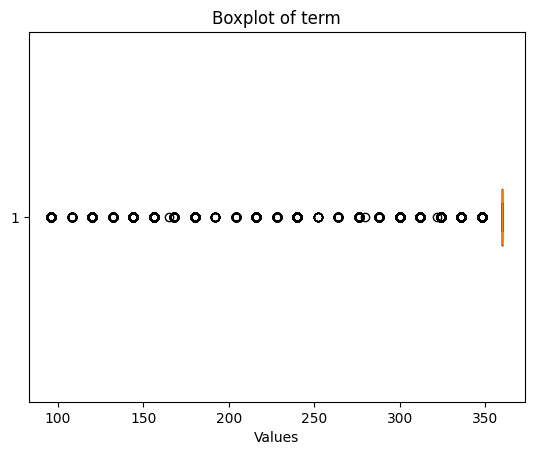

In [ ]:
plt.boxplot(data['term'].dropna(), vert=False)
plt.title('Boxplot of term')
plt.xlabel('Values')
plt.show()

In [ ]:
data['term'].skew()

-2.1716373729703746

Nilai skewness menunjukkan bahwa distribusi data pada upfront_charges  miring ke kiri (negatif skew) dengan sebagian besar data berada di sisi kanan dan beberapa nilai outlier di sisi kiri

Transformasi Box-Cox mengubah data dengan tujuan untuk mengurangi skewness dan membuat distribusi lebih simetris. Penambahan 1 dilakukan untuk memastikan tidak ada nilai nol atau negatif dalam data.

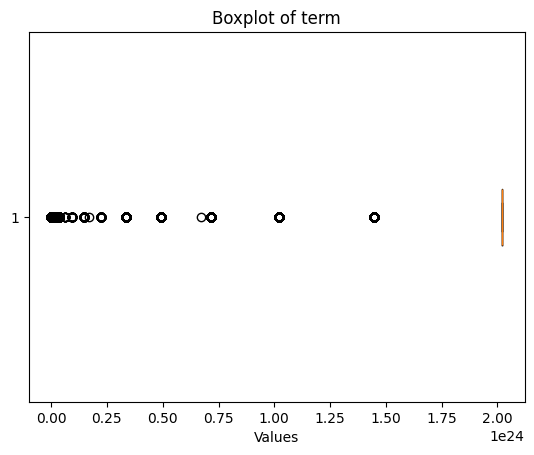

In [ ]:
data['term'] = stats.boxcox(data['term'] + 1)[0]
plt.boxplot(data['term'].dropna(), vert=False)
plt.title('Boxplot of term')
plt.xlabel('Values')
plt.show()

In [ ]:
data['term'].skew()

-1.7266157309743413

Setelah di lakukannya transformasi boxcox, dapat kita lihat kembali sekarang hasil nilai skewness pada kolom term berubah sedikit yang menunjukkan bahwa distirbusi masih sedikit miring ke kiri, tetapi lebih terkontrol dibandingkan sebelumnya

- **Kolom income**

Dengan menggunakan boxplot akan membantu untuk memvisualisasikan distribusi data dan mendeteksi outliers pada kolom income terlebih dahulu

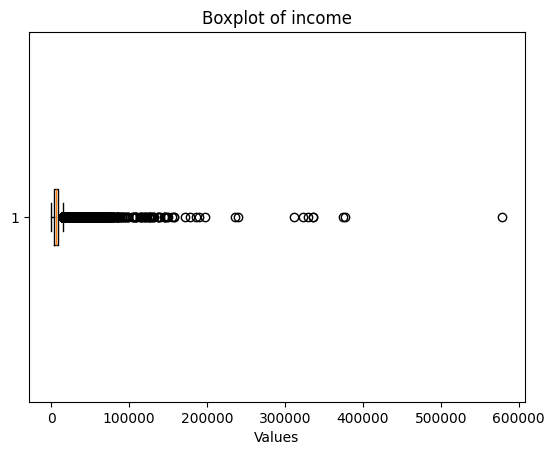

In [ ]:
plt.boxplot(data['income'].dropna(), vert=False)
plt.title('Boxplot of income')
plt.xlabel('Values')
plt.show()

In [ ]:
data['income'].skew()

17.867844342910278

Nilai skewness menunjukkan bahwa distribusi data pada income sangat miring ke kiri (negatif skew) dengan sebagian besar data berada di sisi kanan dan beberapa nilai outlier di sisi kiri

Transformasi Box-Cox mengubah data dengan tujuan untuk mengurangi skewness dan membuat distribusi lebih simetris. Penambahan 1 dilakukan untuk memastikan tidak ada nilai nol atau negatif dalam data.

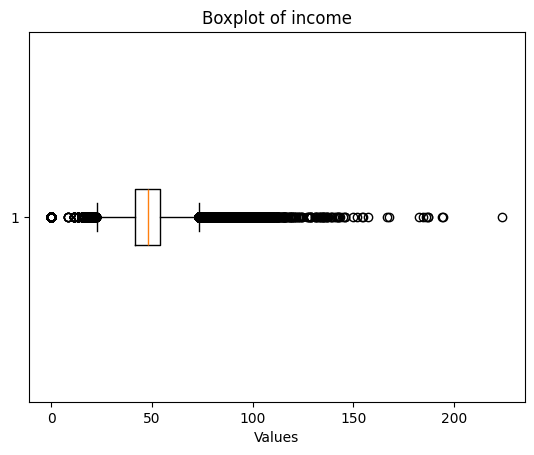

In [ ]:
data['income'] = stats.boxcox(data['income'] + 1)[0]
plt.boxplot(data['income'].dropna(), vert=False)
plt.title('Boxplot of income')
plt.xlabel('Values')
plt.show()

In [ ]:
data['income'].skew()

0.46358387168368365

Setelah di lakukannya transformasi boxcox, dapat kita lihat kembali sekarang hasil nilai skewness pada kolom income telah berkurang dan menunjukkan distribusi data lebih simetris dan lebih normal

- **Kolom ltvr**

Dengan menggunakan boxplot akan membantu untuk memvisualisasikan distribusi data dan mendeteksi outliers pada kolom ltvr terlebih dahulu

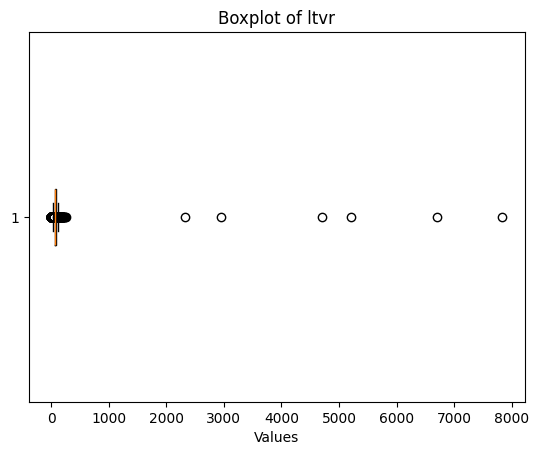

In [ ]:
plt.boxplot(data['ltvr'].dropna(), vert=False)
plt.title('Boxplot of ltvr')
plt.xlabel('Values')
plt.show()

In [ ]:
data['ltvr'].skew()

127.02723103337152

Nilai skewness menunjukkan bahwa distribusi data pada ltvr memiliki extremely high positive skew (sangat miring ke kanan), menunjukkan bahwa banyak nilai ekstrim di sisi kanan data

Transformasi Box-Cox mengubah data dengan tujuan untuk mengurangi skewness dan membuat distribusi lebih simetris. Penambahan 1 dilakukan untuk memastikan tidak ada nilai nol atau negatif dalam data.

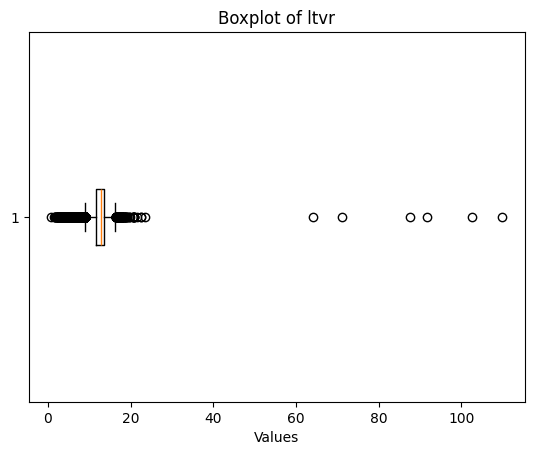

In [ ]:
data['ltvr'] = stats.boxcox(data['ltvr'] + 1)[0]
plt.boxplot(data['ltvr'].dropna(), vert=False)
plt.title('Boxplot of ltvr')
plt.xlabel('Values')
plt.show()

In [ ]:
data['ltvr'].skew()

1.9773955682111986

Setelah di lakukannya transformasi boxcox, dapat kita lihat kembali sekarang hasil nilai skewness pada kolom ltvr telah menjadi lebih rendah yang menunjukkan pengurangan kemiringan, tetapi distribusi data masih menunjukkan sedikit positif skew

- **Kolom dtir**

Dengan menggunakan boxplot akan membantu untuk memvisualisasikan distribusi data dan mendeteksi outliers pada kolom dtir terlebih dahulu

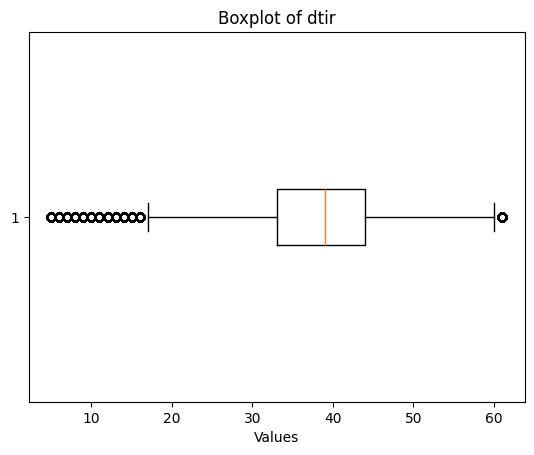

In [ ]:
plt.boxplot(data['dtir'].dropna(), vert=False)
plt.title('Boxplot of dtir')
plt.xlabel('Values')
plt.show()

In [ ]:
data['dtir'].skew()

-0.662223173327201

Nilai skewness menunjukkan bahwa distribusi data pada dtir memiliki kemiringan ke kiri (negatif skew), tetapi menandakan bahwa distribusi data sedikit lebih terdistribusi di sisi kiri

Transformasi Box-Cox mengubah data dengan tujuan untuk mengurangi skewness dan membuat distribusi lebih simetris. Penambahan 1 dilakukan untuk memastikan tidak ada nilai nol atau negatif dalam data.

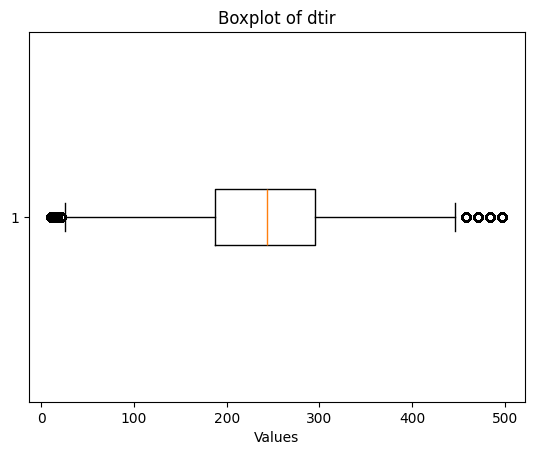

In [ ]:
data['dtir'] = stats.boxcox(data['dtir'] + 1)[0]
plt.boxplot(data['dtir'].dropna(), vert=False)
plt.title('Boxplot of dtir')
plt.xlabel('Values')
plt.show()

In [ ]:
data['dtir'].skew()

-0.004821632839916669

Setelah di lakukannya transformasi boxcox, dapat kita lihat kembali sekarang hasil nilai skewness pada kolom dtir telah menjadi lebih dekat dengan 0, menandakan distribusi data hampir simetris atau normal

Setelah dilakukannya tranformasi terhadap kemiringan data, di sini akan kembali di sajikan perubahan distribusi data setelah di lakukannya transformasi terhadap kolom numerik dengan kolom-kolom yang bertipe data float64 dan int64

In [ ]:
data.select_dtypes(include=['int64'])

,credit_worthiness,total_units,status
0,1,0,1
1,1,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
148665,1,0,0
148666,1,3,0
148667,1,0,0
148668,1,0,0


In [ ]:
data.select_dtypes(include=['float64'])

,loan_amount,rate_of_interest,upfront_charges,term,income,ltvr,dtir
0,66.393365,1.607436,50.977936,2.020519e+24,31.527346,14.638745,306.083598
1,76.950923,1.607436,50.977936,2.020519e+24,45.567027,12.768816,243.879592
2,91.503180,1.715598,24.392622,2.020519e+24,56.844983,13.180336,316.969912
3,94.245736,1.658228,50.977936,2.020519e+24,61.389226,12.263830,274.306660
4,104.915893,1.609438,0.000000,2.020519e+24,58.746778,14.124986,243.879592
...,...,...,...,...,...,...,...
148665,93.177374,1.417066,99.799800,2.184405e+21,53.315916,12.478420,339.176381
148666,100.441487,1.822935,0.000000,2.020519e+24,51.588052,12.708020,54.702949
148667,93.716079,1.417066,35.023421,2.184405e+21,50.985990,11.517501,350.494267
148668,75.975937,1.504077,65.752034,2.184405e+21,51.588052,12.380395,152.718624


## **2.3 Data Scaling**

Pada tahap ini akan dilakukannya proses scaling data dengan menggunakan min-max scalling pada beberapa kolom di dataset. Metode ini merupakan metode normalisasi data yang mengubah nilai-nilai dalam kolom dataset agar berada dalam rentang tertentu, biasanya antara 0 dan 1

Proses ini penting untuk menjaga proporsi skala antar fitur sehingga algoritma pembelajaran mesin yang sensitif terhadap skala (misalnya KNN atau SVM) dapat bekerja optimal.

In [ ]:
columns_to_scale = ['loan_amount', 'rate_of_interest','upfront_charges', 'term', 'income', 'ltvr', 'dtir']

scaler_minmax = MinMaxScaler()
data_minmax_scaled = data.copy()
data_minmax_scaled[columns_to_scale] = scaler_minmax.fit_transform(data[columns_to_scale])

print("\nMinMax Scaled Data:")
print(data_minmax_scaled[columns_to_scale].head())


MinMax Scaled Data:
   loan_amount  rate_of_interest  upfront_charges  term    income      ltvr  \
0     0.225156          0.731576         0.208117   1.0  0.140821  0.126999   
1     0.314114          0.731576         0.208117   1.0  0.203531  0.109855   
2     0.436731          0.780802         0.099582   1.0  0.253905  0.113628   
3     0.459840          0.754692         0.208117   1.0  0.274203  0.105225   
4     0.549747          0.732487         0.000000   1.0  0.262400  0.122288   

       dtir  
0  0.607354  
1  0.479472  
2  0.629735  
3  0.542025  
4  0.479472  


Nilai pada setiap kolom telah berada dalam rentang 0 hingga 1, rentang nilai-nilai ini memastikan bahwa setiap fitur memiliki kontribusi yang seimbang saat digunakan dalam model

# 4. Data Modeling

Data modeling merupakan proses di mana model pembelajaran mesin dibuat dan di latih menggunakan data yang telah di proses sebelumnya. Tahapan ini meliputi memisahkan data menjadi fitur (x) dan label (y), membagi data ke dalam training set dan test set, memilih dan melatih model ml, serta mengevaluasi performa model menggunakan metrik tertentu

## **3.1 Logistic Regression**

1. **Memisahkan fitur dan label**, dimana x adalah dataset fitur yang diperoleh dengan menghapus kolom status dan y merupakan label yaitu kolom status
2. **Membagi data untuk training dan testing**, Dataset dibagi menjadi 80% untuk training dan 20% untuk testing menggunakan fungsi train_test_split
3. **Melatih Model**, Logistic Regression dipilih sebagai model klasifikasi
4. **Membuat Prediksi dan Evaluasi Model**, predict(X_test) menghasilkan prediksi untuk data test, dan Metrik evaluasi seperti Accuracy, Precision, Recall, dan F1-Score digunakan untuk mengukur performa model

In [ ]:
X = data_minmax_scaled.drop(columns=['status'])
y = data_minmax_scaled['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, log_pred):.4f}")
print(f"Precision: {precision_score(y_test, log_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, log_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, log_pred, average='weighted'):.4f}\n")



Logistic Regression:
Accuracy: 0.8676
Precision: 0.8780
Recall: 0.8676
F1-Score: 0.8514



**Hasil Evaluasi Model**
Berdasarkan hasil evaluasi model Logistic Regression
- Accuracy, 86.8% dari prediksi model pada data uji benar, baik untuk kelas 0 (negatif) maupun kelas 1 (positif).
- Precision, mengukur seberapa banyak dari prediksi kelas positif yang benar-benar positif. Dalam hal ini, 87.81% dari prediksi yang diklasifikasikan sebagai kelas 1 benar-benar merupakan kelas 1.
- Recall, mengukur seberapa banyak dari data positif yang berhasil dikenali oleh model. Artinya, model berhasil mengidentifikasi 86.8% dari semua data kelas 1 yang sebenarnya.
- F1-Score, 0.8520 menunjukkan bahwa model memiliki keseimbangan yang baik antara precision dan recall.

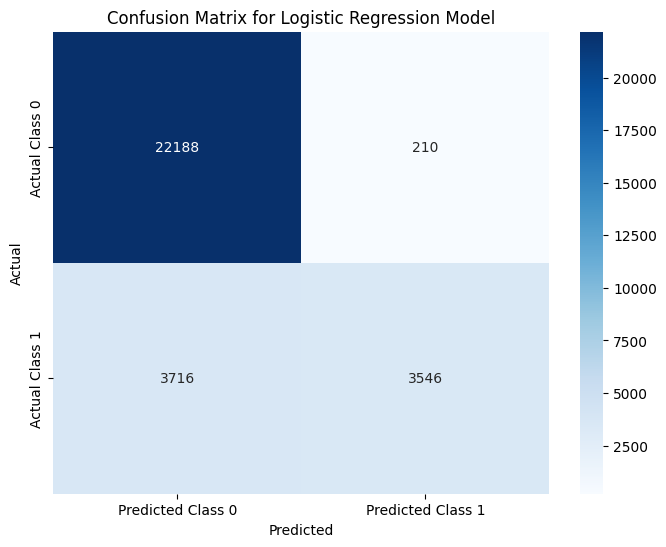

In [ ]:
conf_matrix = confusion_matrix(y_test, log_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

**Confusion Matrix** merupakan alat untuk mengevaluasi performa model klasifikasi dengan menampilkan jumlah prediksi yang benar dan salah untuk masing-masing kelas

- **True Negative (TN)**, Model dengan benar mengklasifikasikan 22,181 sampel sebagai kelas 0 (negatif).
- **False Positive (FP)**, Model salah mengklasifikasikan 217 sampel sebagai kelas 1, padahal mereka seharusnya kelas 0. Type I Error.
- **False Negative (FN)**, Model salah mengklasifikasikan 3,697 sampel sebagai kelas 0, padahal mereka seharusnya kelas 1. Type II Error.
- **True Positive (TP)**, Model dengan benar mengklasifikasikan 3,565 sampel sebagai kelas 1 (positif).

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, log_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     22398
           1       0.94      0.49      0.64      7262

    accuracy                           0.87     29660
   macro avg       0.90      0.74      0.78     29660
weighted avg       0.88      0.87      0.85     29660



**Classification Report** merupakan metrik evaluasi model dalam bentuk laporan klasifikasi untuk masing-masing kelas (0 dan 1)
- **Precision untuk kelas 0**, 86% dari prediksi kelas 0 adalah benar.
- **Recall untuk kelas 0**, Model sangat baik dalam mengidentifikasi kelas 0, dengan 99% dari semua contoh kelas 0 berhasil terdeteksi.
- **F1-Score untuk kelas 0**, Keseimbangan antara precision dan recall untuk kelas 0 adalah 92%, menunjukkan kinerja model yang baik dalam mengenali kelas 0.
-------
- **Precision untuk kelas 1**, 94% dari prediksi kelas 1 adalah benar.
- **Recall untuk kelas 1**, Model hanya berhasil mengidentifikasi 49% dari data kelas 1 yang sebenarnya. Artinya, masih banyak contoh kelas 1 yang tidak terdeteksi dengan benar (tingginya False Negative).
- **F1-Score untuk kelas 1**, F1-Score untuk kelas 1 lebih rendah, menunjukkan adanya ketidakseimbangan dalam kemampuan model untuk mengenali kelas 1, meskipun precision-nya tinggi.
---------
- **Accuracy**, Secara keseluruhan, model akurat 87% dari waktu.
- **Macro Average** : Precision: 0.90, Recall: 0.74, F1-Score: 0.78
Ini adalah rata-rata metrik untuk semua kelas, tanpa mempertimbangkan distribusi kelas.
- **Weighted Average** : Precision: 0.88, Recall: 0.87, F1-Score: 0.85
Ini adalah rata-rata yang mempertimbangkan distribusi kelas, memberikan bobot lebih pada kelas yang lebih sering muncul.

## **3.2 Random Forest**

1. **Melatih Model**, Random Forest Classifier dipilih sebagai model klasifikasi
2. **Membuat Prediksi dan Evaluasi Model**, predict(X_test) menghasilkan prediksi untuk data test, dan Metrik evaluasi seperti Accuracy, Precision, Recall, dan F1-Score digunakan untuk mengukur performa model

In [ ]:
rf_model = RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred, average='weighted'):.4f}\n")

Random Forest:
Accuracy: 0.9086
Precision: 0.9184
Recall: 0.9086
F1-Score: 0.9007



**Hasil Evaluasi Model**
Berdasarkan hasil evaluasi model Random Forest
- Accuracy, 89.96% dari prediksi model pada data uji benar, baik untuk kelas 0 (negatif) maupun kelas 1 (positif).
- Precision, 91.13% menunjukkan bahwa dari semua prediksi model yang diklasifikasikan sebagai kelas positif. Hal ini mencerminkan bahwa model sangat akurat dalam memprediksi kelas 1.
- Recall, model berhasil mengidentifikasi 89.96% dari semua data kelas positif (kelas 1) yang sebenarnya
- F1-Score, 89.98% menunjukkan bahwa model memiliki keseimbangan yang sangat baik antara precision dan recall.

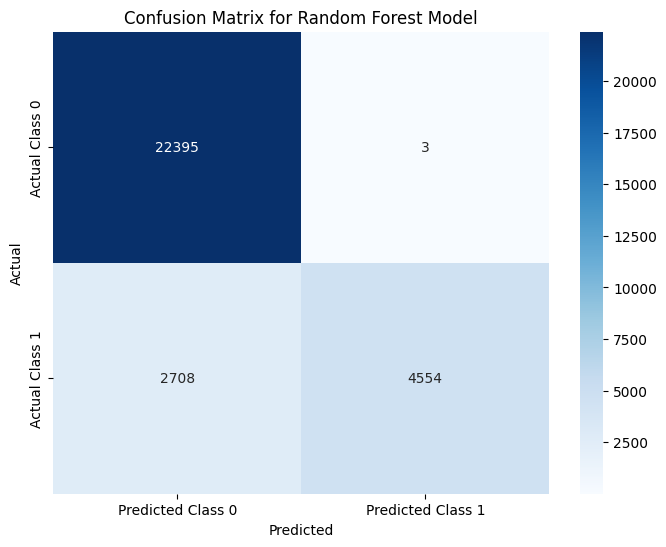

In [ ]:
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

**Confusion Matrix**
- **True Negative (TN)**, Model dengan benar mengklasifikasikan 22,396 sampel sebagai kelas 0 (negatif).
- **False Positive (FP)**, Model salah mengklasifikasikan 2 sampel sebagai kelas 1, padahal mereka seharusnya kelas 0 (Type I Error).
- **False Negative (FN)**, Model salah mengklasifikasikan 2,977 sampel sebagai kelas 0, padahal mereka seharusnya kelas 1 (Type II Error).
- **True Positive (TP)**, Model dengan benar mengklasifikasikan 4,285 sampel sebagai kelas 1 (positif).

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     22398
           1       1.00      0.63      0.77      7262

    accuracy                           0.91     29660
   macro avg       0.95      0.81      0.86     29660
weighted avg       0.92      0.91      0.90     29660



**Classification Report**
- **Precision untuk kelas 0**, 88%, menunjukkan bahwa 88% dari prediksi kelas 0 benar-benar berasal dari kelas 0.
- **Recall untuk kelas 0**, 100%, artinya model berhasil mengenali semua sampel kelas 0 yang sebenarnya (sangat baik dalam mendeteksi kelas 0).
- **F1-Score untuk kelas 0**, 94%, menunjukkan keseimbangan yang sangat baik antara precision dan recall untuk kelas 0.
-------
- **Precision untuk kelas 1**, 100%, artinya semua prediksi kelas 1 benar-benar berasal dari kelas 1.
- **Recall untuk kelas 1**, 59%, menunjukkan bahwa hanya 59% dari semua sampel kelas 1 yang sebenarnya berhasil dikenali oleh model (tingginya False Negative).
- **F1-Score untuk kelas 1**, 74%, menunjukkan bahwa model masih memiliki ruang untuk meningkatkan keseimbangan antara precision dan recall dalam mengenali kelas 1.
---------
- **Accuracy**, Model memiliki akurasi keseluruhan sebesar 90%, menunjukkan bahwa mayoritas prediksi pada data uji adalah benar.
- **Macro Average** : Precision: 94%, Recall: 79%, F1-Score: 84%
- **Weighted Average** : Precision: 91%, Recall: 90%, F1-Score: 89%

## **3.3 K Nearest Neighbor**

1. **Melatih Model**, K-Nearest Neighbors (KNN) dipilih sebagai model klasifikasi
2. **Membuat Prediksi dan Evaluasi Model**, predict(X_test) menghasilkan prediksi untuk data test, dan Metrik evaluasi seperti Accuracy, Precision, Recall, dan F1-Score digunakan untuk mengukur performa model

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("K Nearest Neighbor:")
print(f"Accuracy: {accuracy_score(y_test, knn_pred):.4f}")
print(f"Precision: {precision_score(y_test, knn_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, knn_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, knn_pred, average='weighted'):.4f}\n")

K Nearest Neighbor:
Accuracy: 0.8739
Precision: 0.8696
Recall: 0.8739
F1-Score: 0.8693



**Hasil Evaluasi Model**
Berdasarkan hasil evaluasi model K Nearest Neighbor
- Accuracy, 87.39% dari prediksi model pada data uji benar, baik untuk kelas 0 (negatif) maupun kelas 1 (positif).
- Precision, 86.96% menunjukkan bahwa dari semua prediksi model yang diklasifikasikan sebagai kelas positif.
- Recall, model berhasil mengidentifikasi 87.39% dari semua data kelas positif (kelas 1) yang sebenarnya.
- F1-Score, 86.93% menunjukkan bahwa model memiliki keseimbangan yang baik antara precision dan recall.

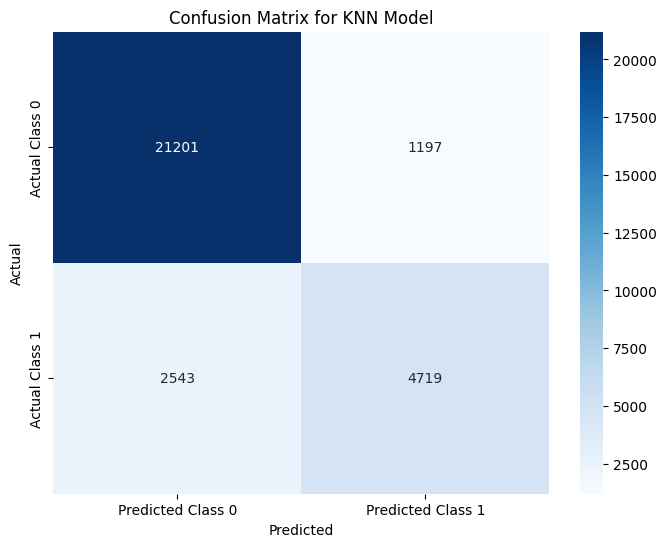

In [ ]:
conf_matrix = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model')
plt.show()

**Confusion Matrix**
- **True Negative (TN)**, Model dengan benar mengklasifikasikan 21,201 sampel sebagai kelas 0 (negatif).
- **False Positive (FP)**, Model salah mengklasifikasikan 1,197 sampel sebagai kelas 1, padahal mereka seharusnya kelas 0 (Type I Error).
- **False Negative (FN)**, Model salah mengklasifikasikan 2,543 sampel sebagai kelas 0, padahal mereka seharusnya kelas 1 (Type II Error).
- **True Positive (TP)**, Model dengan benar mengklasifikasikan 4,719 sampel sebagai kelas 1 (positif).

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, knn_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     22398
           1       0.80      0.65      0.72      7262

    accuracy                           0.87     29660
   macro avg       0.85      0.80      0.82     29660
weighted avg       0.87      0.87      0.87     29660



**Classification Report**
- **Precision untuk kelas 0**, 89%, menunjukkan bahwa 89% dari prediksi kelas 0 benar-benar berasal dari kelas 0.
- **Recall untuk kelas 0**, 95%, artinya model berhasil mengenali hampir semua sampel kelas 0 yang sebenarnya (sangat baik dalam mendeteksi kelas 0).
- **F1-Score untuk kelas 0**, 92%, menunjukkan keseimbangan yang sangat baik antara precision dan recall untuk kelas 0.
-------
- **Precision untuk kelas 1**, 80%, artinya 80% dari prediksi kelas 1 benar-benar berasal dari kelas 1.
- **Recall untuk kelas 1**, 65%, menunjukkan bahwa hanya 65% dari semua sampel kelas 1 yang sebenarnya berhasil dikenali oleh model (tingginya False Negative).
- **F1-Score untuk kelas 1**, 72%, menunjukkan bahwa model masih memiliki ruang untuk meningkatkan keseimbangan antara precision dan recall dalam mengenali kelas 1.
---------
- **Accuracy**, Model memiliki akurasi keseluruhan sebesar 87%, menunjukkan bahwa mayoritas prediksi pada data uji adalah benar.
- **Macro Average** : Precision: 85%, Recall: 80%, F1-Score: 82%.
- **Weighted Average** : Precision: 87%, Recall: 87%, F1-Score: 87%.

## **3.4 SVM**

1. **Melatih Model**, Support Vector Machine (SVM) dengan kernel linear dipilih sebagai model klasifikasi. Model ini dilatih menggunakan data pelatihan untuk menemukan hyperplane optimal yang memisahkan kelas-kelas dalam dataset.
2. **Membuat Prediksi dan Evaluasi Model**, predict(X_test) menghasilkan prediksi untuk data test, dan Metrik evaluasi seperti Accuracy, Precision, Recall, dan F1-Score digunakan untuk mengukur performa model

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.4f}")
print(f"Precision: {precision_score(y_test, svm_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, svm_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, svm_pred, average='weighted'):.4f}\n")

SVM:
Accuracy: 0.8605
Precision: 0.8747
Recall: 0.8605
F1-Score: 0.8409



**Hasil Evaluasi Model**
Berdasarkan hasil evaluasi model SVM
- Accuracy, 86.05% dari prediksi model pada data uji benar, baik untuk kelas 0 (negatif) maupun kelas 1 (positif).
- Precision, 87.47% menunjukkan bahwa dari semua prediksi model yang diklasifikasikan sebagai kelas positif, sebagian besar benar.
- Recall, model berhasil mengidentifikasi 86.05% dari semua data kelas positif (kelas 1) yang sebenarnya.
- F1-Score, 84.09% menunjukkan bahwa model memiliki keseimbangan yang cukup baik antara precision dan recall.

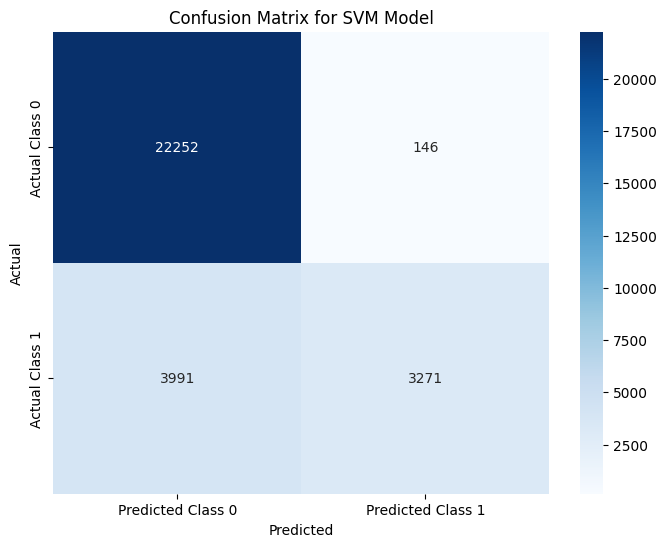

In [ ]:
conf_matrix = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model')
plt.show()

**Confusion Matrix**
- **True Negative (TN)**, Model dengan benar mengklasifikasikan 22,252 sampel sebagai kelas 0 (negatif).
- **False Positive (FP)**, Model salah mengklasifikasikan 146 sampel sebagai kelas 1, padahal mereka seharusnya kelas 0 (Type I Error).
- **False Negative (FN)**, Model salah mengklasifikasikan 3,991 sampel sebagai kelas 0, padahal mereka seharusnya kelas 1 (Type II Error).
- **True Positive (TP)**, Model dengan benar mengklasifikasikan 3,271 sampel sebagai kelas 1 (positif).

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, svm_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     22398
           1       0.96      0.45      0.61      7262

    accuracy                           0.86     29660
   macro avg       0.90      0.72      0.76     29660
weighted avg       0.87      0.86      0.84     29660



**Classification Report**
- **Precision untuk kelas 0**, 85%, menunjukkan bahwa 85% dari prediksi kelas 0 benar-benar berasal dari kelas 0.
- **Recall untuk kelas 0**, 99%, artinya model berhasil mengenali hampir semua sampel kelas 0 yang sebenarnya (sangat baik dalam mendeteksi kelas 0).
- **F1-Score untuk kelas 0**, 91%, menunjukkan keseimbangan yang sangat baik antara precision dan recall untuk kelas 0.
-------
- **Precision untuk kelas 1**, 96%, artinya 96% dari prediksi kelas 1 benar-benar berasal dari kelas 1.
- **Recall untuk kelas 1**, 45%, menunjukkan bahwa hanya 45% dari semua sampel kelas 1 yang sebenarnya berhasil dikenali oleh model (tingginya False Negative).
- **F1-Score untuk kelas 1**, 61%, menunjukkan bahwa model memiliki ruang untuk meningkatkan keseimbangan antara precision dan recall dalam mengenali kelas 1.
---------
- **Accuracy**, Model memiliki akurasi keseluruhan sebesar 86%, menunjukkan bahwa mayoritas prediksi pada data uji adalah benar.
- **Macro Average** : Precision: 90%, Recall: 72%, F1-Score: 76%.
- **Weighted Average** : Precision: 87%, Recall: 86%, F1-Score: 84%.